In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import SN_Curve_Doe.utils.plot_functions
from SN_Curve_Doe.Bayesian_SN_Calculation.WoehlerParams_hmc_pymc5 import WoehlerCurve_hmc
from SN_Curve_Doe.Bayesian_SN_Calculation.WoehlerParams_optimizer import WoehlerCurve_optimizer
import numpy as np
import json
import matplotlib.ticker as mticker
import random

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data_aluminium = pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\data\04_Reduced Data\01_Manual entry\Data aluminium.xlsx")

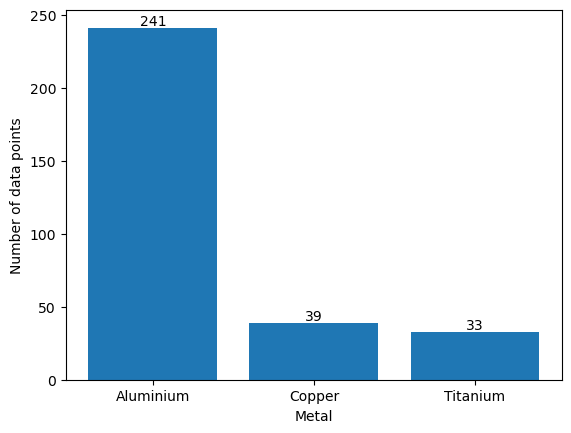

In [107]:
dic = {'Aluminium': len(data_aluminium), 'Copper': len(data_copper), 'Titanium': len(data_titanium)}

plt.bar(dic.keys(), dic.values())
plt.xlabel('Metal')
plt.ylabel('Number of data points')

for i, count in enumerate(dic.values()):
    plt.text(i, count + 2, str(count), ha='center')
plt.show()

Plotting bar graph for number of test conducted in each datapoints

In [32]:
def plot(df,string):
    lst = []
    for i in range(len(df)):
        string_data = df['FT_results'][i]
        if string_data is not None:
            dic = json.loads(string_data.replace("'", "\""))
            a = len(np.array(dic['s_a']))
            lst.append(a)
    plt.figure(figsize=(20,10))
    plt.hist(lst, bins=50, range=(0,50))
    plt.title(string)
    plt.xlabel('Number of tests conducted')
    plt.xlim(0,50)
    plt.xticks(range(0,51,1))
    plt.ylabel('Number of data points')
    
    plt.show()

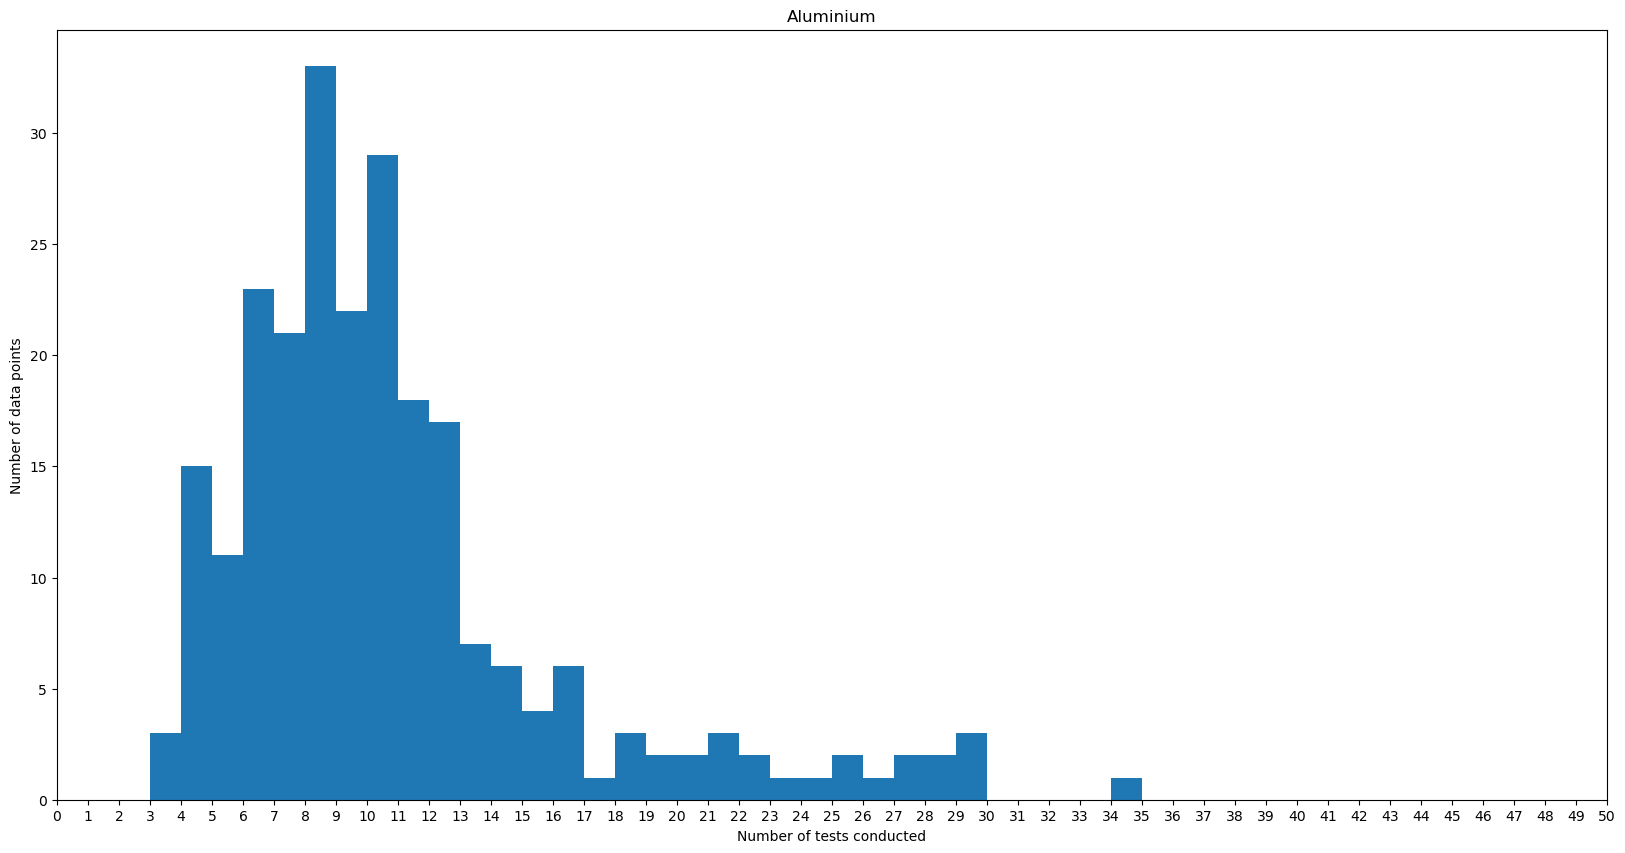

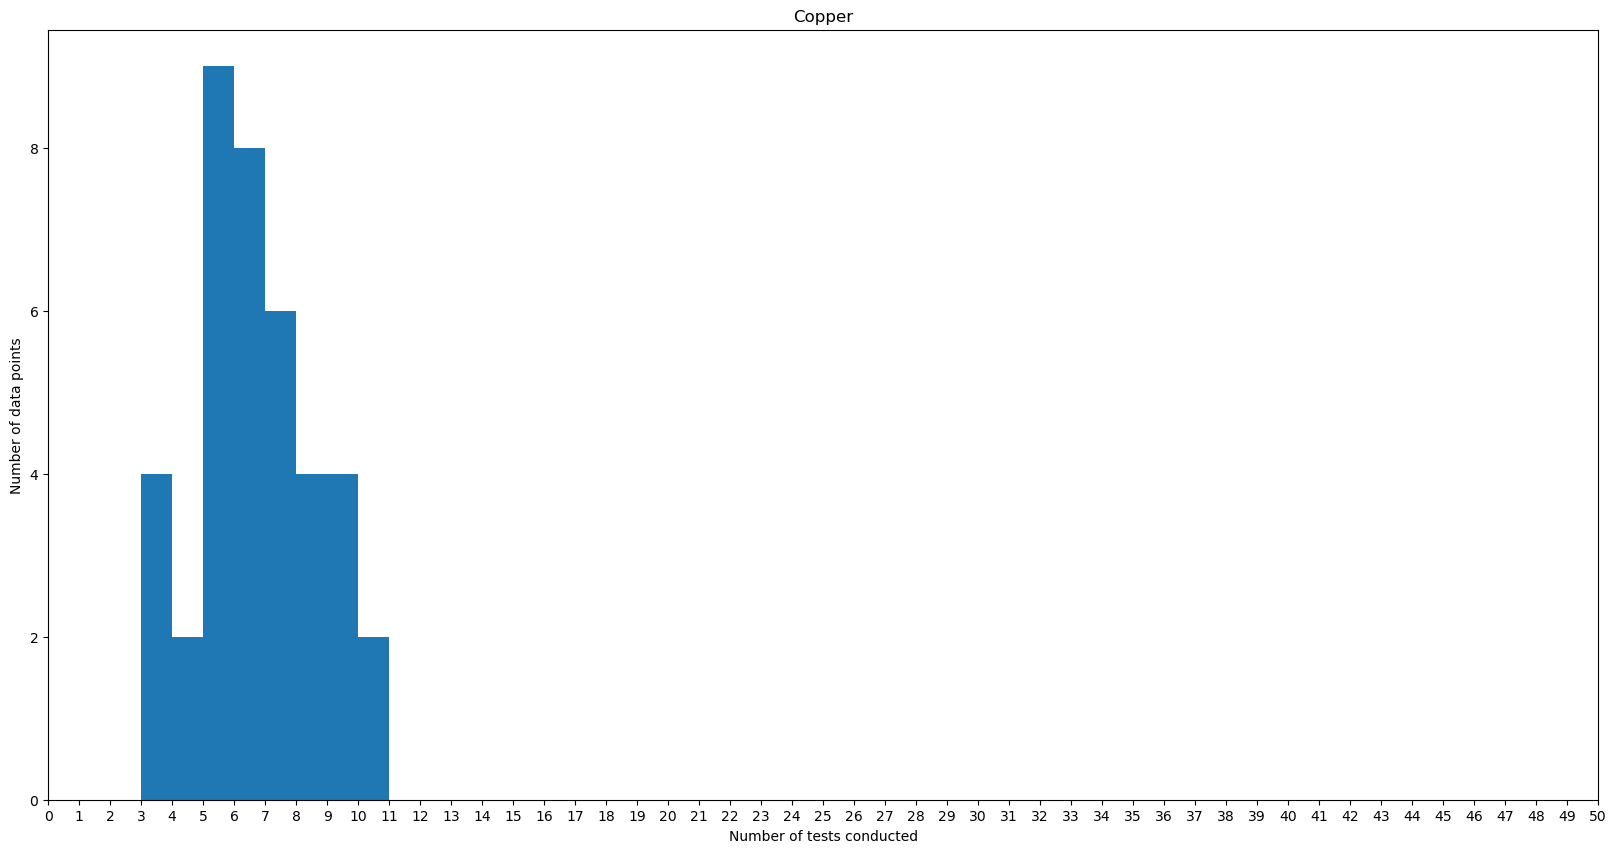

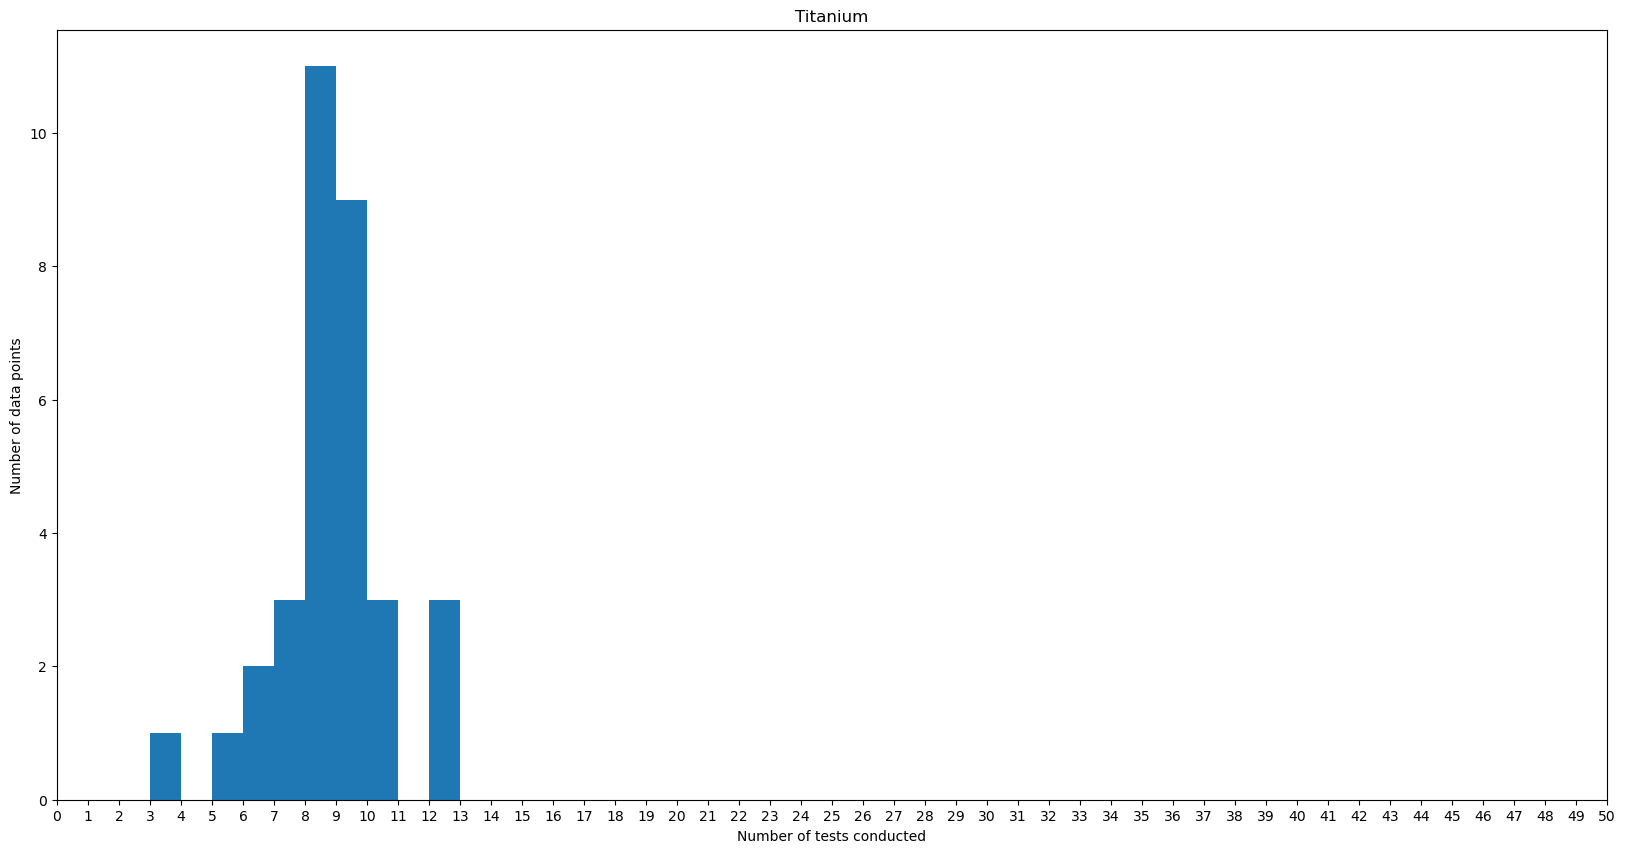

In [49]:
plot(data_aluminium,'Aluminium')

Plotting random SN curves

In [4]:
def format_scientific(number):
    scientific_str = f"{number:.3e}"
    base, exponent = scientific_str.split('e')
    formated_output = f"{base} 10^{int(exponent)}"
    return formated_output

In [4]:
def plot_SN(df,num):
    string_data = df['FT_results'][num]
    dic = json.loads(string_data.replace("'", "\""))
    new_dic = {'s_a':np.array(dic['s_a']),'n':np.array(dic['n']),'outcome':np.array(dic['outcome'])}

    curve_optimizer = WoehlerCurve_optimizer(fkm=0, calc_posterior=False, prior_from_ki={}, region_to_optimize = "all_param")
    curve_optimizer.calc_wl_params(new_dic['s_a'], new_dic['n'], new_dic['outcome'])
    wl_parameter = curve_optimizer.Mali_4p_result
    #print(df['FT_results'][num])
    
    fig, axes = plt.subplots(1,1,figsize=(6, 6))
    SN_Curve_Doe.utils.plot_functions.plot_model(axes, new_dic, wl_parameter, label='Ground Truth',color='black')
    SN_Curve_Doe.utils.plot_functions.plot_woehler_points(axes, new_dic, color='orange')
    axes.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    # for i, (key, value) in enumerate(wl_parameter.items()):
    #     if key == 'n_e':
    #         value = format_scientific(value)
    #     else:
    #         value = "{:.3f}".format(value)
    #     axes.text(0.1 + i*0.25,1.02, f"{key}: {value}", transform=axes.transAxes, ha='center', fontsize=10)
    plt.show()

In [11]:
string_data = data_aluminium['FT_results'][2]
dic = json.loads(string_data.replace("'", "\""))
new_dic = {'s_a':np.array(dic['s_a']),'n':np.array(dic['n']),'outcome':np.array(dic['outcome'])}
print(new_dic)
curve_optimizer = WoehlerCurve_optimizer(fkm=0, calc_posterior=False, prior_from_ki={}, region_to_optimize = "all_param")
curve_optimizer.calc_wl_params(new_dic['s_a'], new_dic['n'], new_dic['outcome'])
wl_parameter = curve_optimizer.Mali_4p_result

print(wl_parameter)

print(data_aluminium['FT_results'][2],data_aluminium['CodeSeries'][2])

{'s_a': array([170., 170., 114., 109., 170., 126.,  59.,  96.,  96.,  92.,  54.,
        46.]), 'n': array([    1700,     1700,    13100,    39900,     4800,    16400,
        7900000,    65700,  1810000,    95200, 15700000, 17200000]), 'outcome': array(['failure', 'failure', 'failure', 'failure', 'failure', 'failure',
       'failure', 'failure', 'failure', 'runout', 'runout'], dtype='<U7')}
trying mystic
{'s_d': 90.64732997444551, 'one_t_s': 2.0030490797956952, 'k': 5.658732869710338, 'n_e': 85679.99999581785}
{'s_a': [170.0, 170.0, 114.0, 109.0, 170.0, 126.0, 59.0, 96.0, 96.0, 92.0, 54.0, 46.0], 'n': [1700, 1700, 13100, 39900, 4800, 16400, 7900000, 65700, 1810000, 95200, 15700000, 17200000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure',  'failure',  'failure', 'failure', 'runout', 'runout']} 120-007


{'s_a': [121.0, 100.0, 80.0, 76.0, 70.0, 60.0, 45.0, 40.0], 'n': [692000, 1443000, 2612000, 6440000, 13819999, 20099999, 10020000, 15800000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout', 'runout', 'runout', 'runout']} 155-405
trying mystic


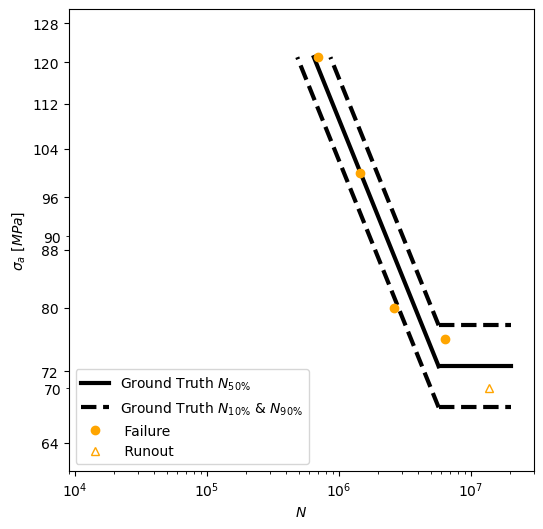

{'s_a': [121.0, 78.0, 65.0, 60.0, 45.0, 40.0, 35.0, 30.0, 30.0, 28.0], 'n': [881199, 2048000, 2224000, 1850000, 3330000, 1752000, 2230000, 4061000, 13840000, 14080000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 155-407
trying mystic


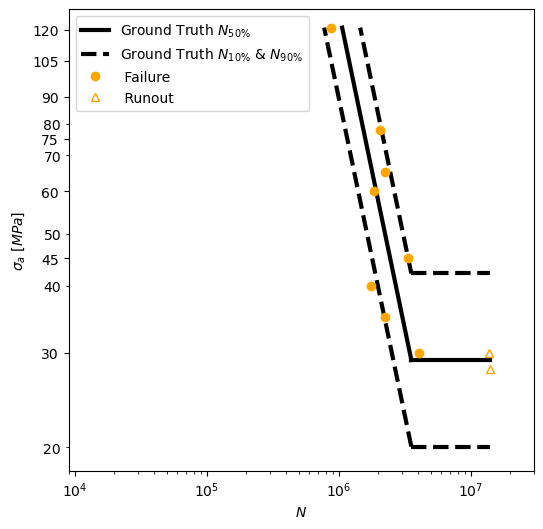

{'s_a': [137.0, 127.0, 118.0, 108.0, 98.0, 98.0, 93.0, 88.0, 88.0, 83.0, 83.0], 'n': [328200, 382000, 1101000, 1714000, 2133000, 3643000, 2898000, 13960000, 18120000, 14360000, 25920000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 186-071
trying mystic


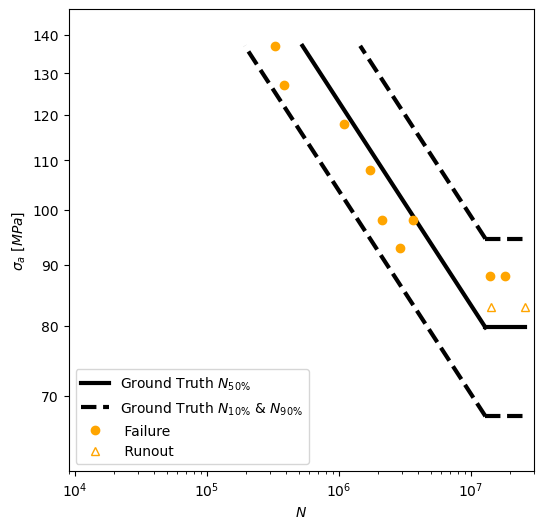

{'s_a': [186.0, 177.0, 167.0, 157.0, 152.0, 147.0, 142.0, 142.0, 137.0, 132.0, 132.0, 127.0, 127.0, 118.0], 'n': [99000, 136000, 220000, 260000, 567000, 785000, 4614000, 12908000, 5385000, 12481000, 19247000, 20501000, 36222000, 35771000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'failure', 'runout', 'runout', 'runout', 'runout', 'runout']} 186-030
trying mystic


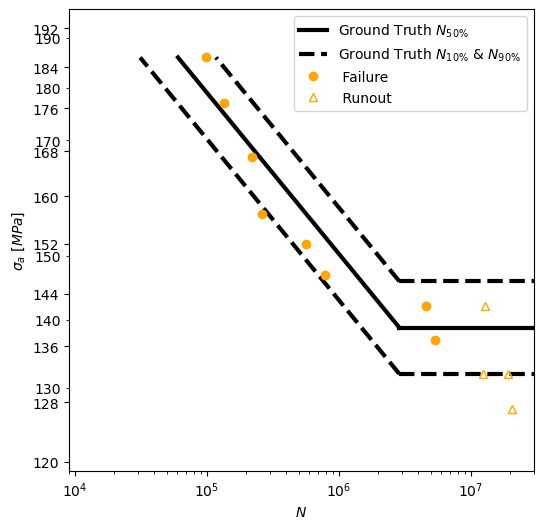

{'s_a': [137.0, 127.0, 118.0, 118.0, 113.0, 108.0, 108.0, 108.0, 103.0, 103.0, 98.0, 98.0, 98.0], 'n': [148000, 269000, 262000, 822000, 17847000, 417000, 850000, 10596000, 10810000, 19677000, 10515000, 17003000, 46780000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout', 'failure', 'failure', 'failure', 'runout', 'runout', 'runout', 'runout', 'runout']} 186-031
trying mystic


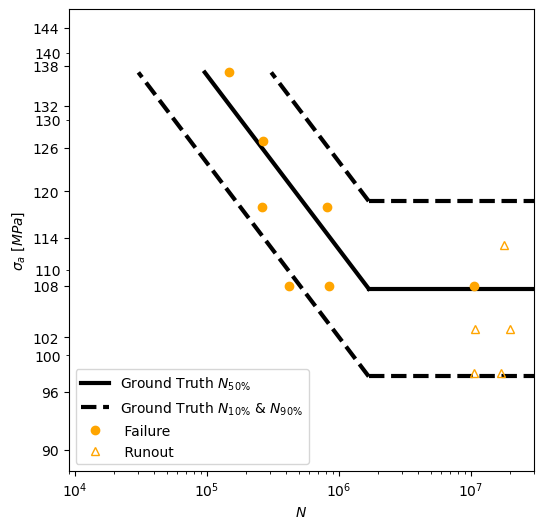

{'s_a': [118.0, 108.0, 98.0, 88.0, 88.0, 83.0, 83.0, 78.0, 78.0, 74.0, 74.0, 69.0, 69.0], 'n': [60000, 101000, 97000, 167000, 256000, 206999, 2394000, 710000, 10109999, 11478000, 19220000, 29070000, 38950000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout', 'runout', 'runout', 'runout']} 186-032
trying mystic


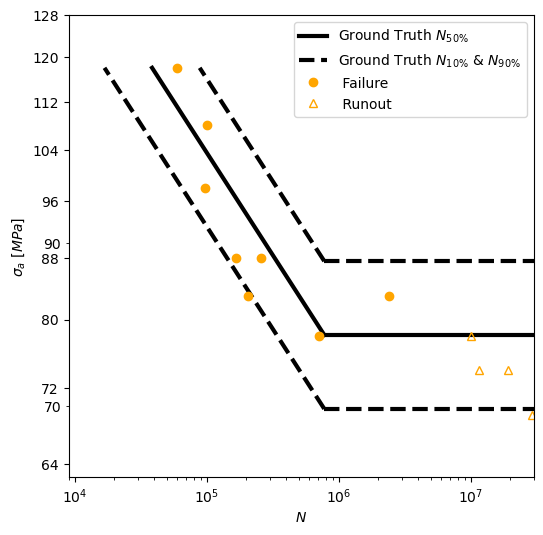

{'s_a': [137.0, 127.0, 118.0, 113.0, 108.0, 103.0, 103.0, 98.0, 98.0, 98.0, 93.0, 93.0], 'n': [84000, 133000, 148000, 219000, 1227000, 1308000, 4073000, 186000, 1180000, 2151000, 20147000, 26165000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 186-034
trying mystic


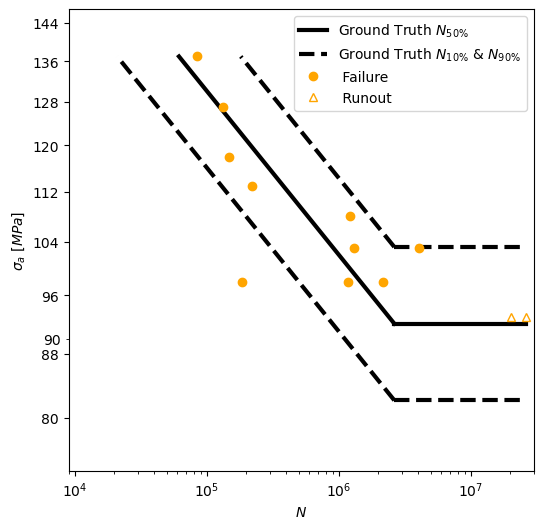

{'s_a': [167.0, 157.0, 152.0, 147.0, 142.0, 137.0, 130.0, 127.0, 127.0, 123.0, 123.0, 118.0], 'n': [112000, 180000, 459999, 844999, 859000, 1801000, 4114000, 4755000, 11995000, 22475000, 27105000, 37075000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout', 'runout', 'runout']} 186-033
trying mystic


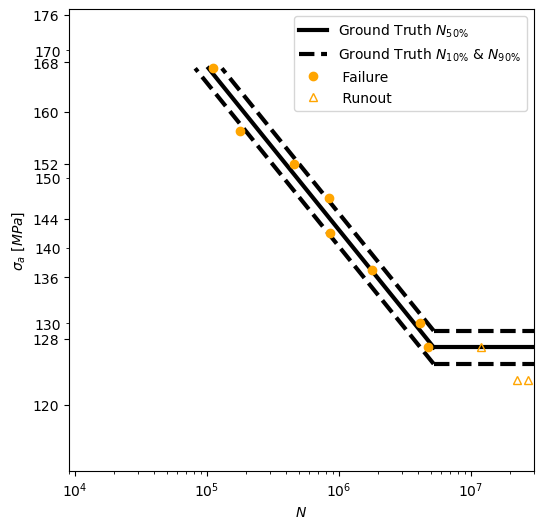

{'s_a': [108, 98, 88, 83, 78, 74, 69, 64, 59, 59, 54, 54], 'n': [62000, 111000, 108000, 381000, 876000, 724000, 13162000, 514000, 1611000, 10820000, 22350000, 26088000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 186-035
trying mystic


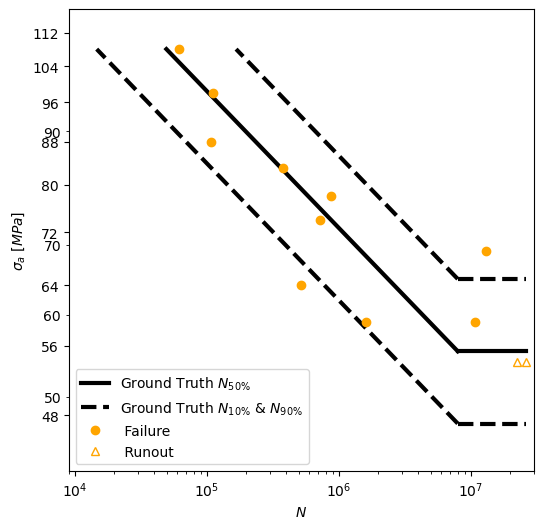

{'s_a': [118.0, 118.0, 108.0, 98.0, 98.0, 88.0, 78.0, 78.0, 69.0, 69.0], 'n': [499500, 535000, 808300, 951300, 978700, 4035999, 2868000, 3767000, 19420000, 21760000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 186-073
trying mystic


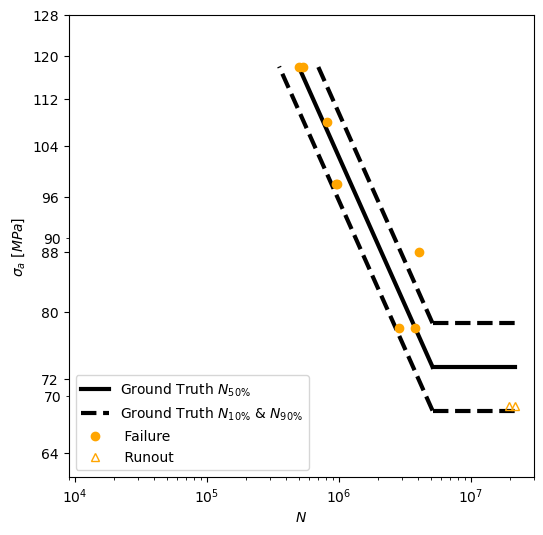

{'s_a': [255.0, 235.0, 216.0, 196.0, 186.0, 177.0, 167.0, 167.0, 162.0, 157.0, 157.0, 152.0], 'n': [51000, 92000, 100400, 225500, 274000, 3815000, 1098000, 2724000, 9343000, 7513000, 10210000, 12000000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 186-074
trying mystic


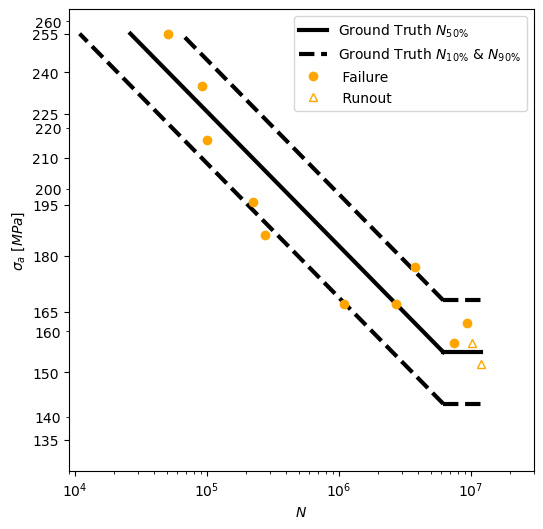

{'s_a': [147.0, 142.0, 137.0, 132.0, 127.0, 127.0, 118.0, 113.0, 113.0, 108.0, 103.0, 103.0, 98.0, 98.0, 98.0], 'n': [78000, 90000, 162000, 324000, 301000, 376000, 441000, 459000, 811000, 3010000, 1072000, 1727000, 11170000, 19254000, 38148000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout', 'runout']} 186-037
trying mystic


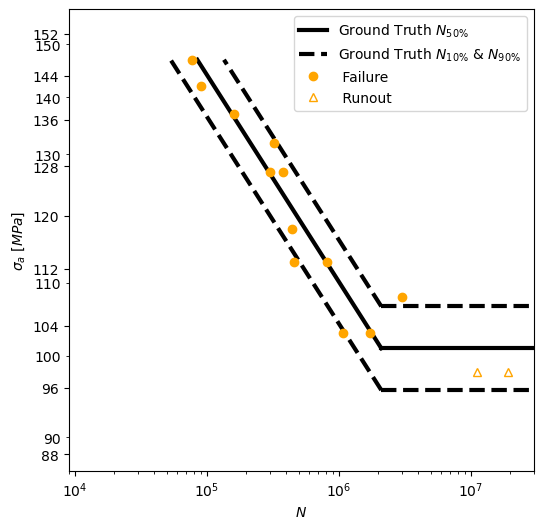

{'s_a': [196.0, 186.0, 177.0, 167.0, 157.0, 152.0, 142.0, 137.0, 132.0, 127.0, 127.0, 127.0, 123.0, 123.0, 118.0, 118.0, 118.0, 113.0, 113.0, 108.0, 108.0], 'n': [64000, 111000, 170000, 299000, 449000, 621000, 1496000, 3969000, 2910000, 3270000, 8041000, 12183000, 6601000, 36193000, 2837000, 6905000, 49830000, 16396000, 22517000, 21131000, 53763000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'failure', 'runout', 'failure', 'failure', 'runout', 'runout', 'runout', 'runout', 'runout']} 186-036
trying mystic


C:\Users\ngc2kor\Documents\masterthesis_angadi\src\SN_Curve_Doe\Bayesian_SN_Calculation\WoehlerParams_optimizer.py:1419: RuntimeWarning: divide by zero encountered in log
  np.log(


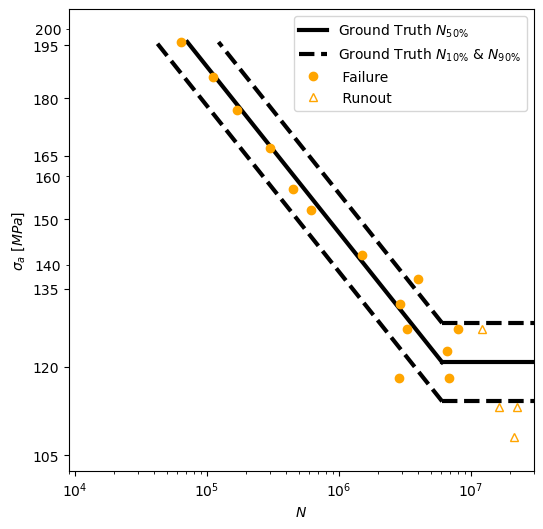

{'s_a': [127.0, 118.0, 108.0, 98.0, 90.0, 83.0, 78.0, 74.0, 74.0, 69.0, 69.0], 'n': [76000, 163000, 367000, 640000, 1823000, 1253000, 8542000, 7205000, 13997000, 13351000, 41682000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'failure', 'runout', 'runout', 'runout']} 186-038
trying mystic


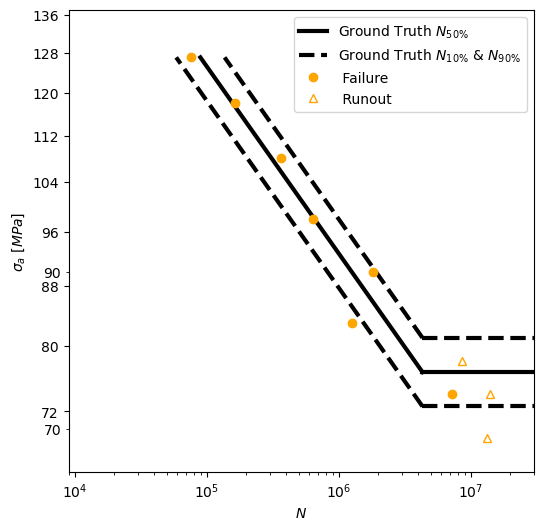

{'s_a': [88.0, 78.0, 52.0, 51.0], 'n': [32000, 110000, 10500000, 10000000], 'outcome': ['failure', 'failure', 'failure', 'runout']} 348-000
trying mystic


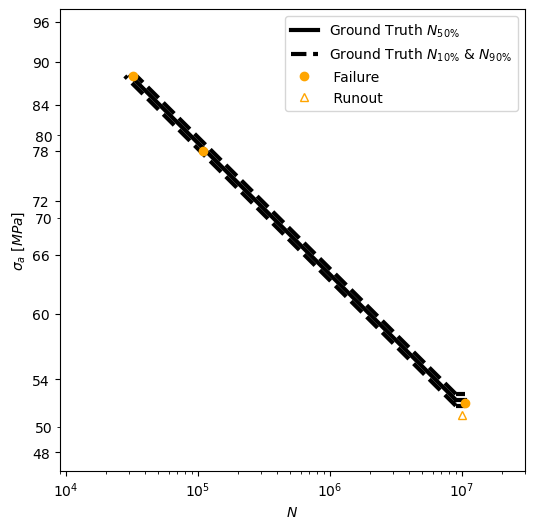

{'s_a': [89.0, 87.0, 82.0, 79.0, 76.0], 'n': [140000, 150000, 1200000, 11000000, 10000000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout']} 348-010
trying mystic


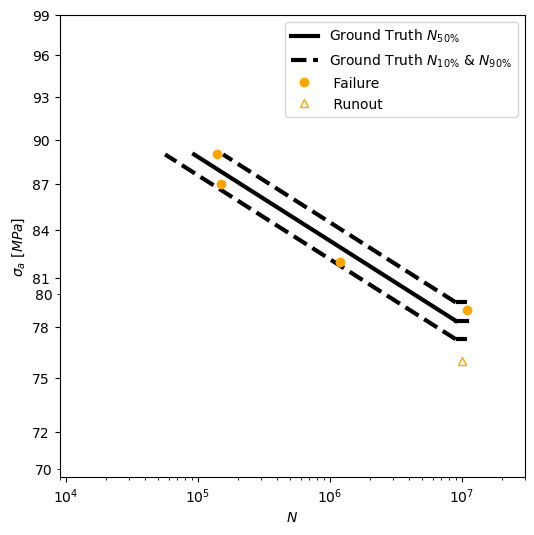

{'s_a': [102.0, 98.0, 95.0, 91.0, 88.0, 90.0], 'n': [110000, 1100000, 380000, 1300000, 12000000, 5500000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout', 'failure']} 348-030
trying mystic


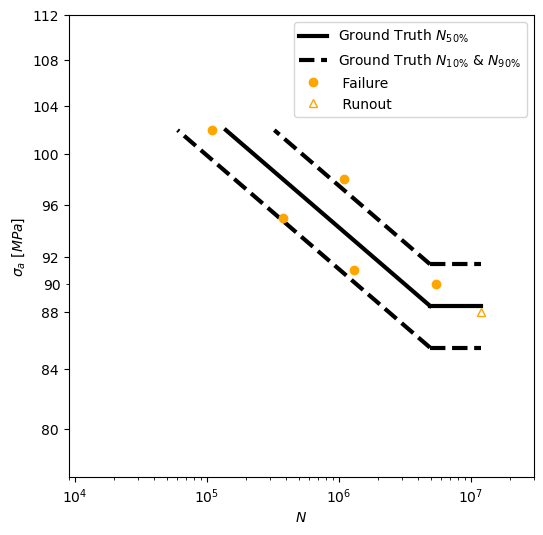

{'s_a': [81.0, 77.0, 76.0, 70.0, 69.0, 67.0, 64.0], 'n': [160000, 380000, 440000, 7200000, 5200000, 11000000, 12000000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'failure', 'runout', 'runout']} 348-020
trying mystic


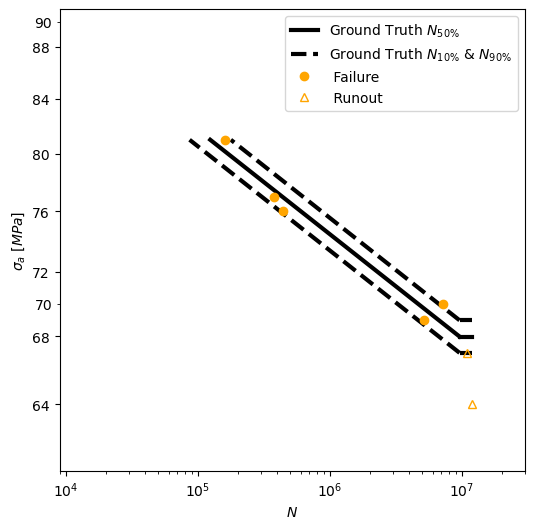

{'s_a': [126.0, 118.0, 111.0, 109.0, 108.0], 'n': [100000, 160000, 570000, 1200000, 12000000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout']} 348-040
trying mystic


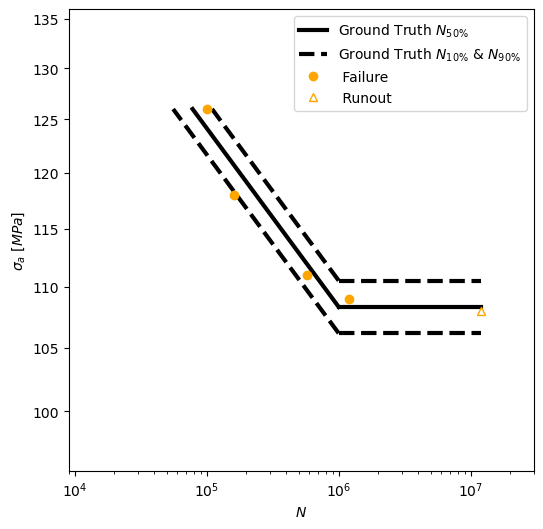

{'s_a': [119.0, 111.0, 105.0, 103.0, 102.0], 'n': [120000, 390000, 780000, 4300000, 13000000], 'outcome': ['failure', 'failure', 'failure', 'failure', 'runout']} 348-050
trying mystic


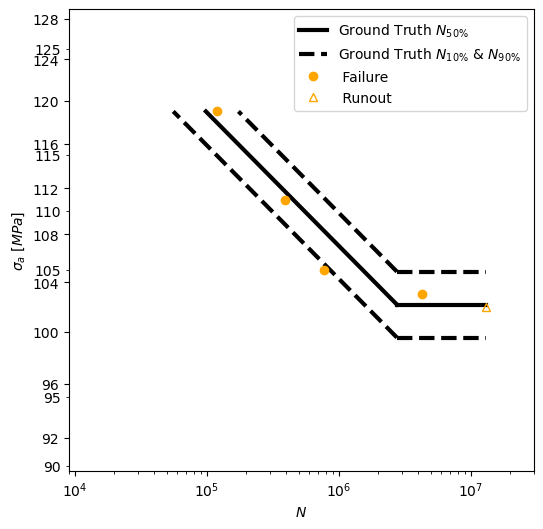

In [5]:
for i in range(150, 170):
    try:
        print(data_aluminium['FT_results'][i], data_aluminium['CodeSeries'][i] )
        plot_SN(data_aluminium,i)
        #print(f"CodeSeries: {data_steel['CodeSeries'][numbers[i]]}, Page: {data_steel['Page'][numbers[i]]}, s_d_conf: {data_steel['s_d_conf'][numbers[i]]}, one_t_s_conf: {data_steel['one_t_s_conf'][numbers[i]]}  ")
        
    except ValueError:
        pass

Scatter plots and Gaussian plots for numerical data

In [81]:
#num_col_ferrous = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)','Fe', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'V', 'Cu', 'Al', 'Ti','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST','TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)','Fat_spec_StressConcentraionFactor', 'FT_frequency','FT_number_machines','s_d', 'one_t_s', 'k', 'n_e','s_d_conf','one_t_s_conf','k_conf','n_e_conf']
num_col_aluminium = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)','Al', 'Cu', 'Fe', 'Mg', 'Mn', 'Si', 'Sn', 'Zn', 'Cr', 'Ti','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_StressConcentraionFactor','FT_frequency', 'FT_number_machines']

In [82]:
def scatter_gauss_plot(df,metal):
    # Plot each column data one by one
    for column in df.columns:
        try:
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.scatter(df.index,df[column])
            plt.title(f'{metal} - {column}', fontsize=8)
            plt.xlabel('Index')
            plt.ylabel('Value')

            try:
                plt.subplot(1,2,2)
                sns.distplot(df[column], fit=norm, kde=False)
                plt.title(f'{metal} - {column}', fontsize=8)
                plt.xlabel('Value')
                plt.ylabel('Frequency')
                mean = df[column].mean()
                std_dev = df[column].std()
                plt.text(0.5,0.9, f'Mean: {mean:.2f}\nStd dev: {std_dev:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))
                plt.tight_layout()
                plt.show()
            except np.linalg.LinAlgError as e:
                print(f"LinAlgError: {e}. Skipping the distribution plot for {metal} - {column}.")
                
        except TypeError:
            print(f'None type entries exist in column: {column}')
            continue

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_25864\1848931710.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], fit=norm, kde=False)


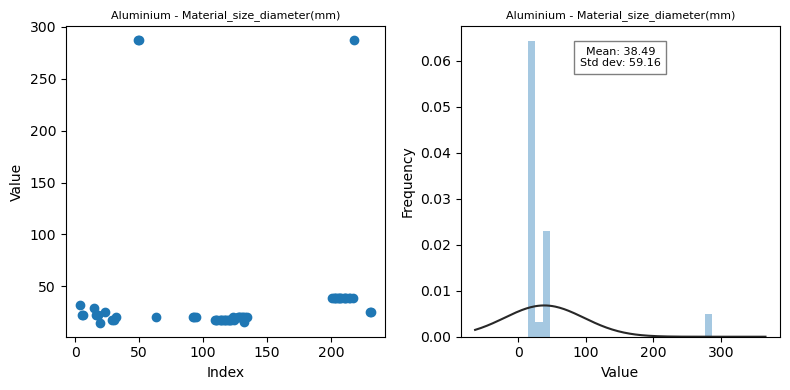

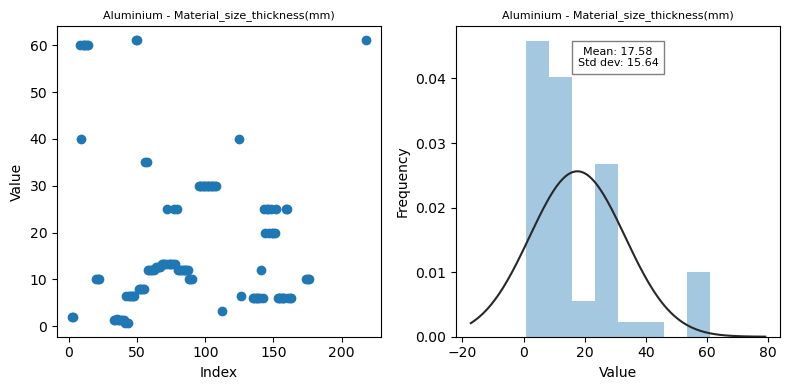

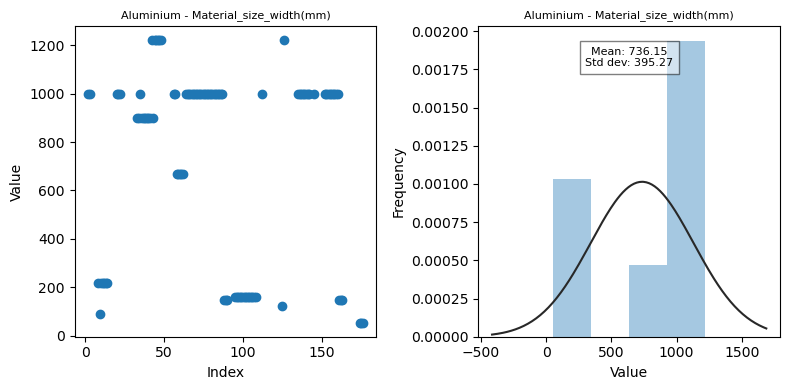

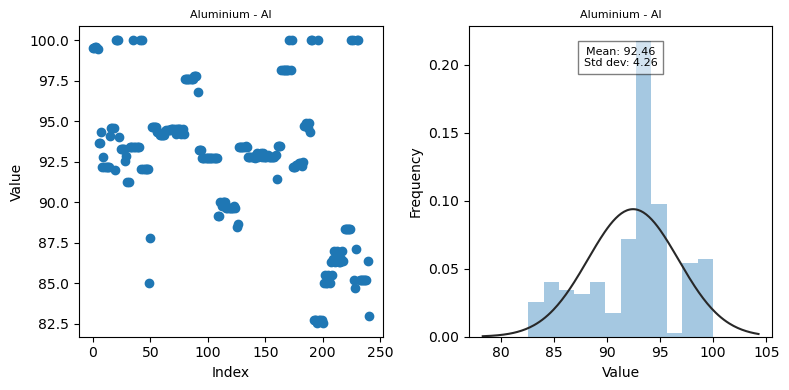

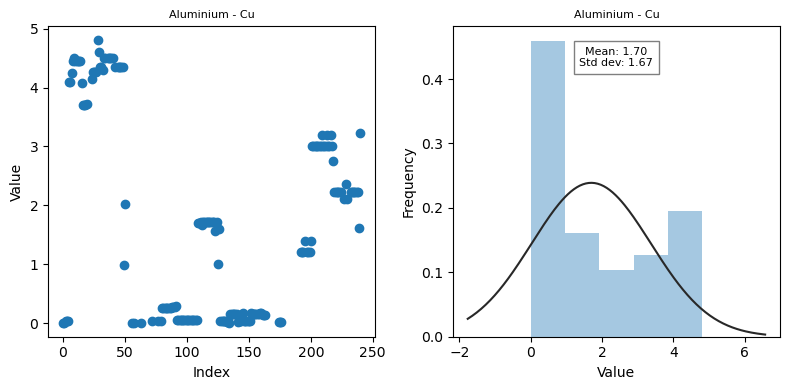

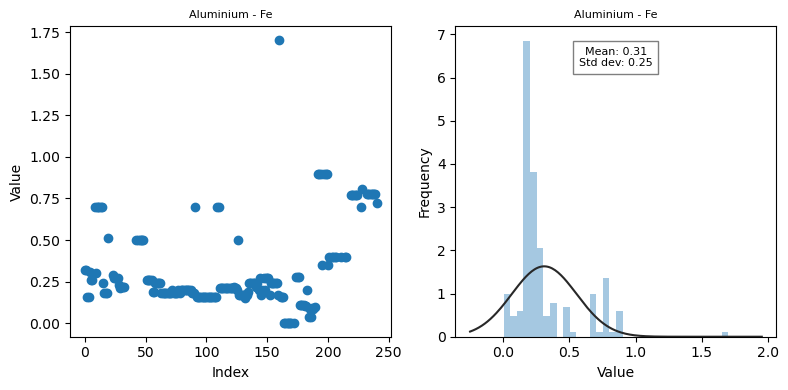

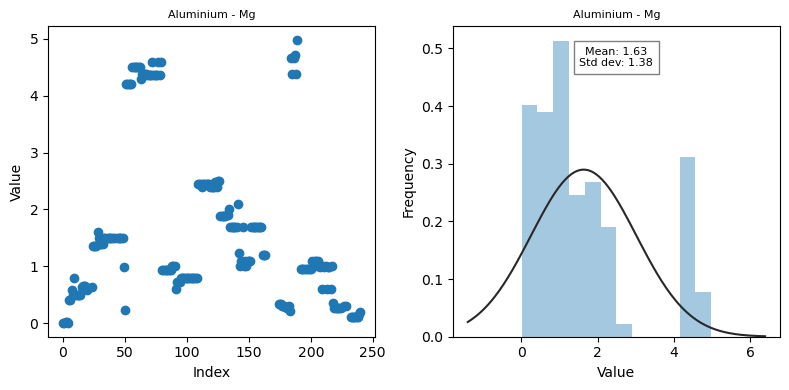

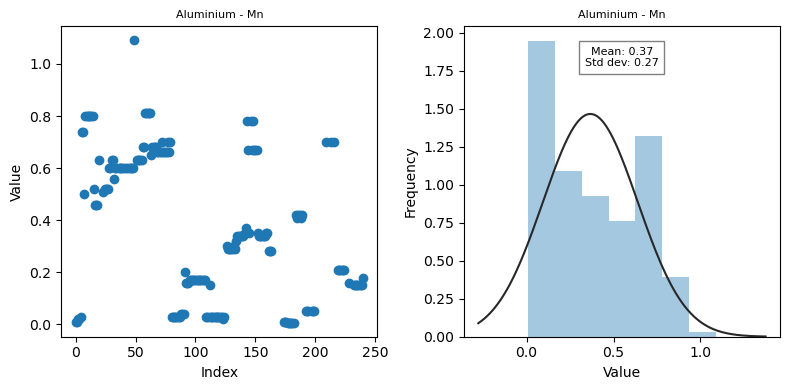

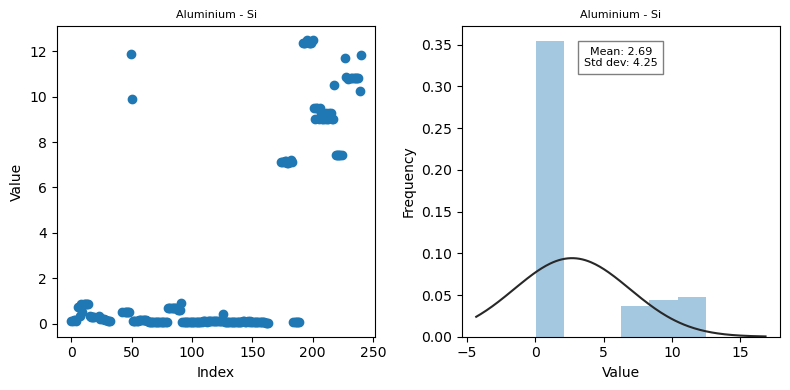

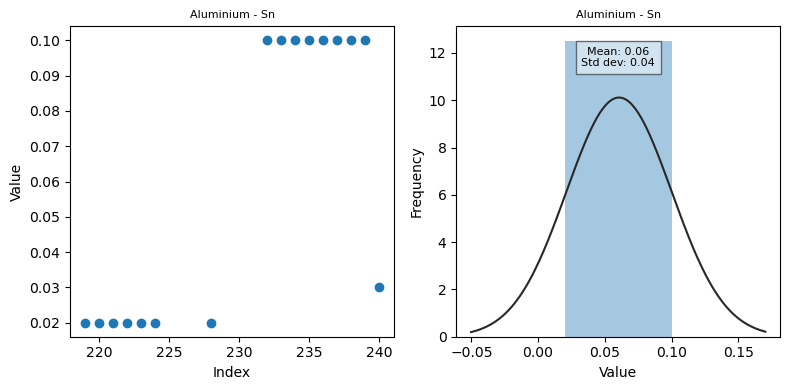

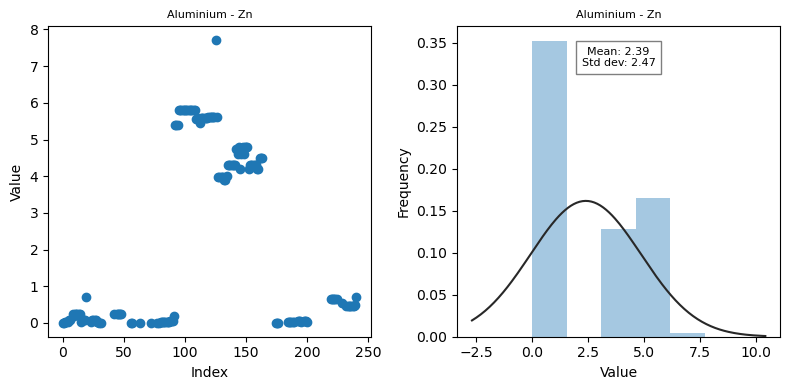

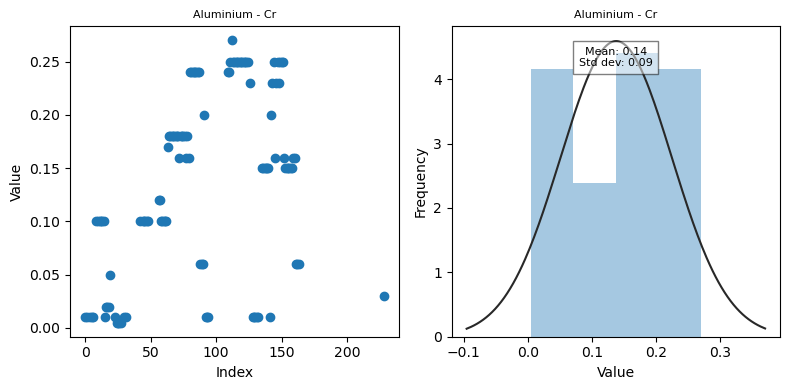

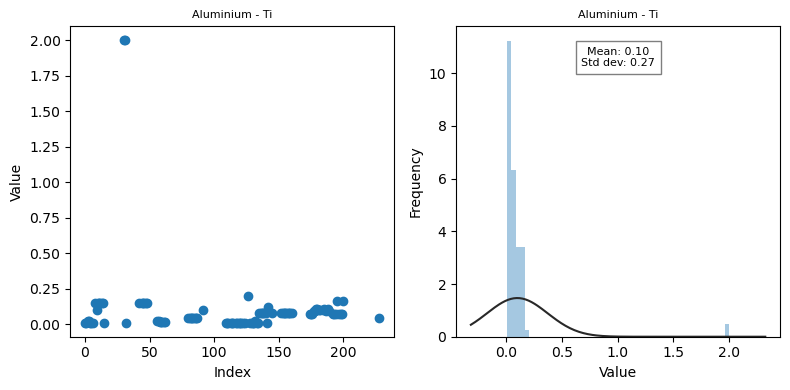

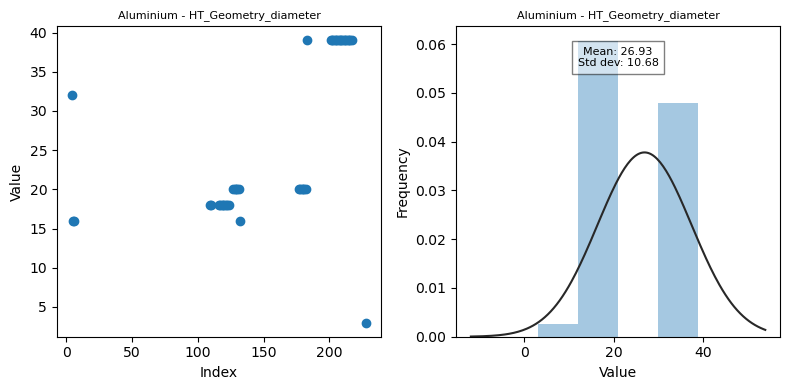

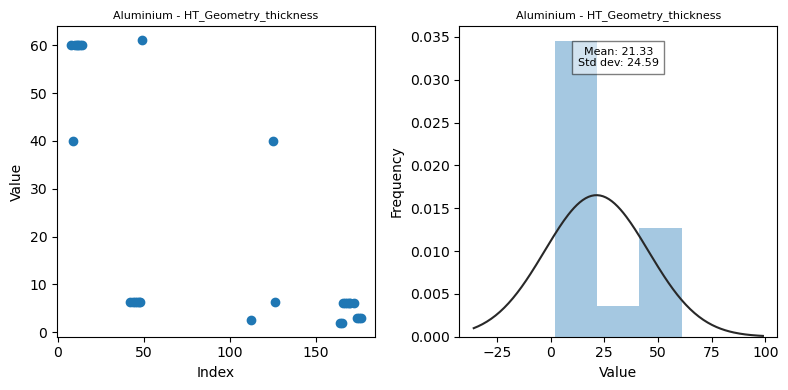

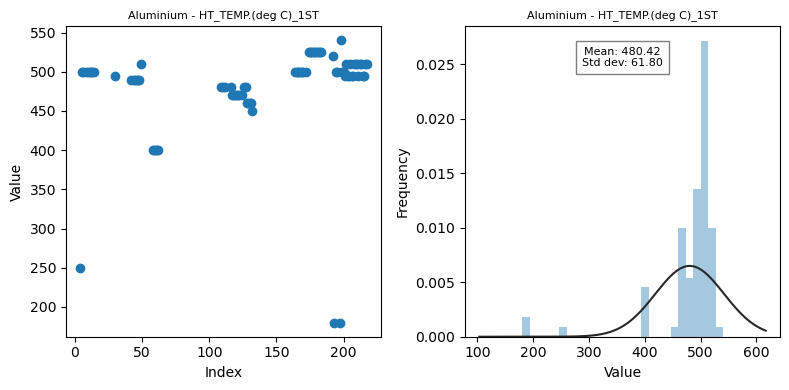

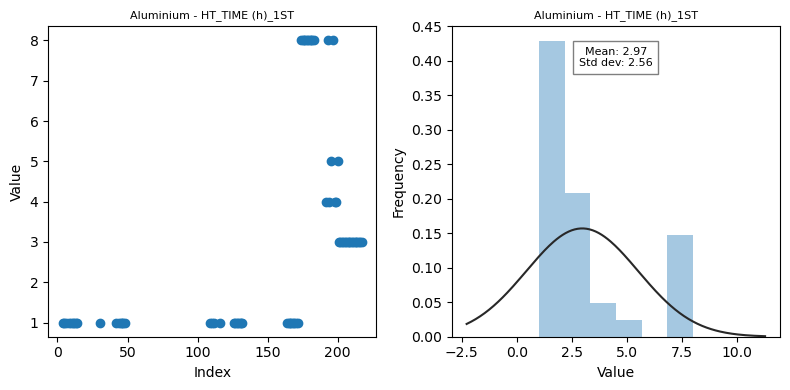

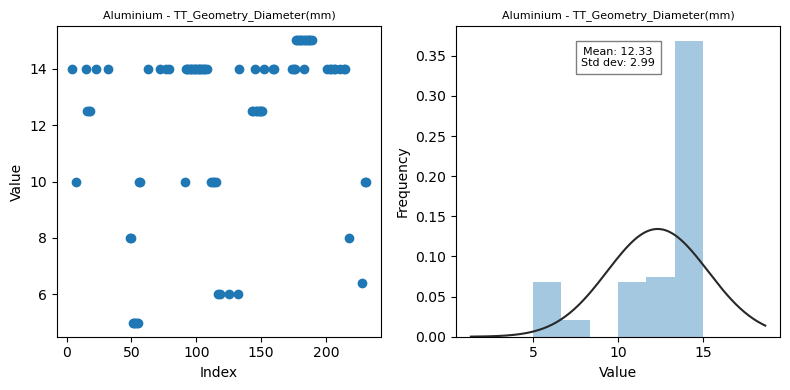

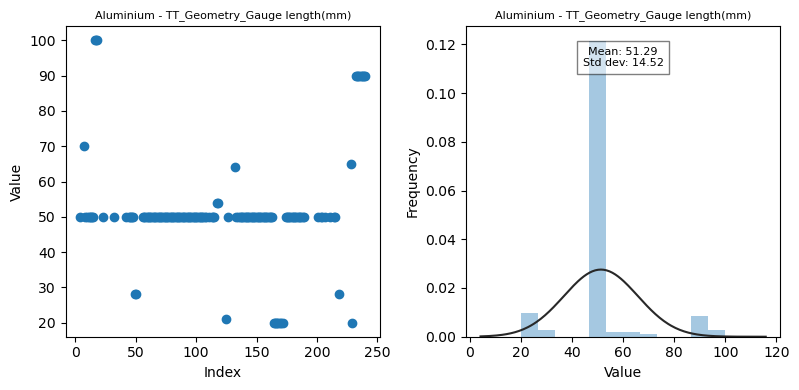

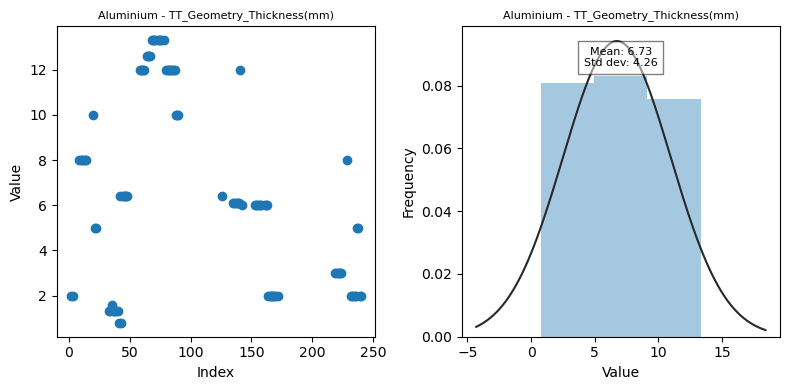

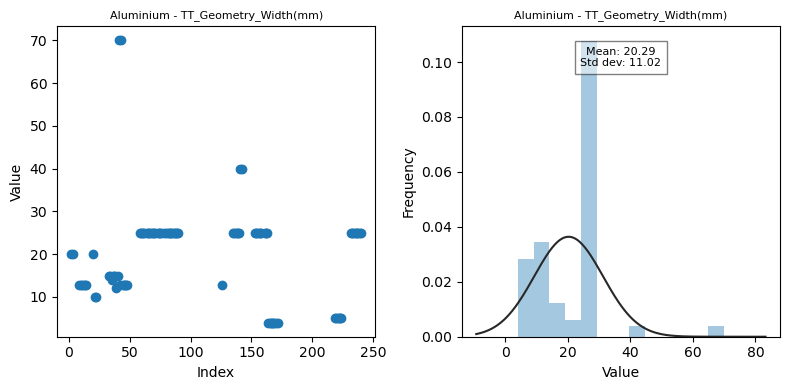

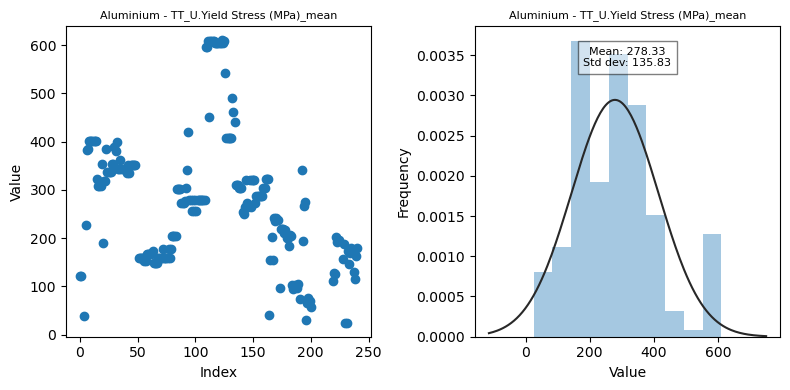

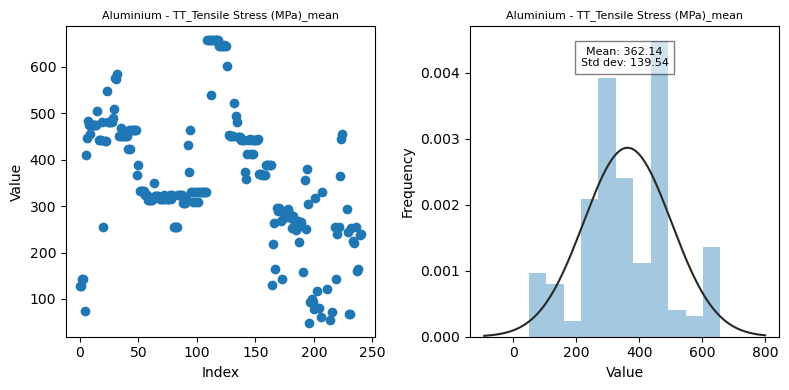

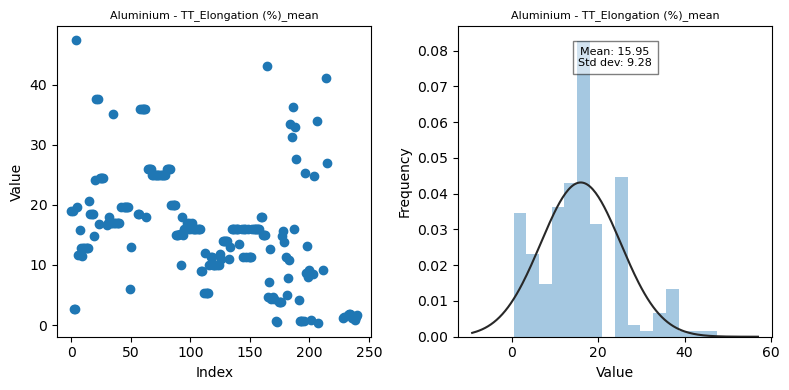

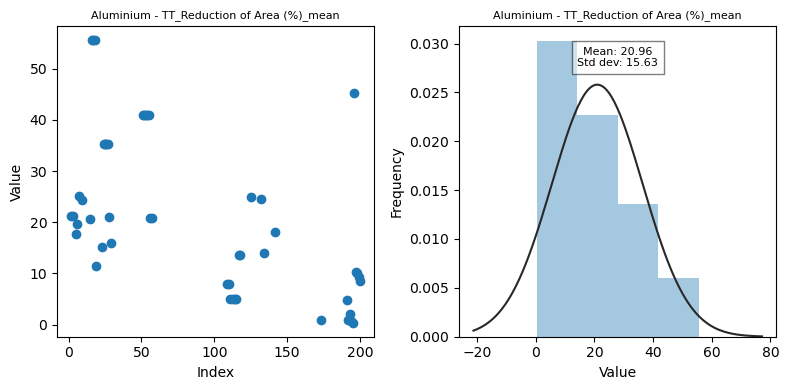

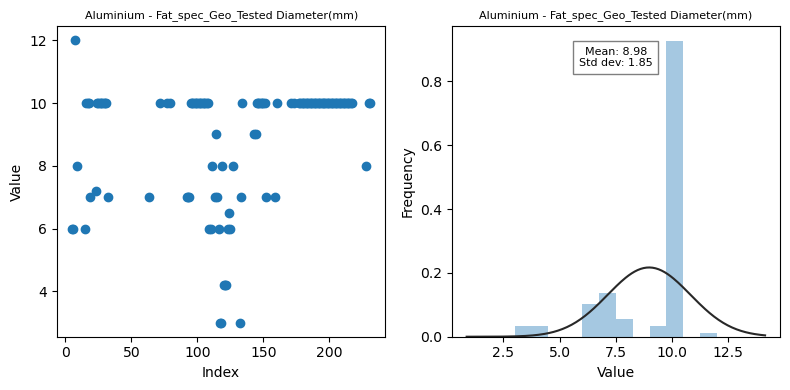

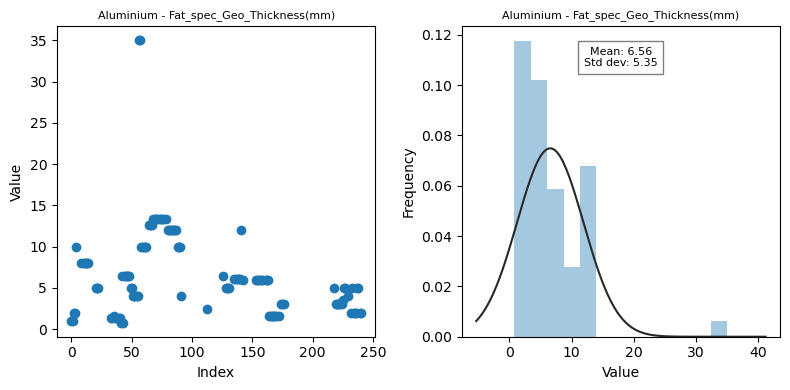

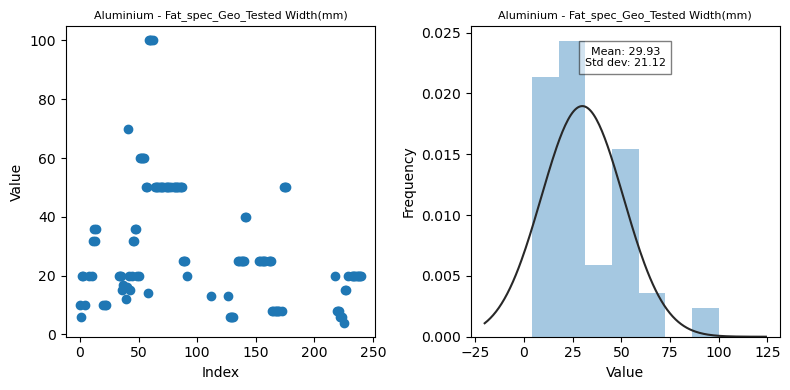

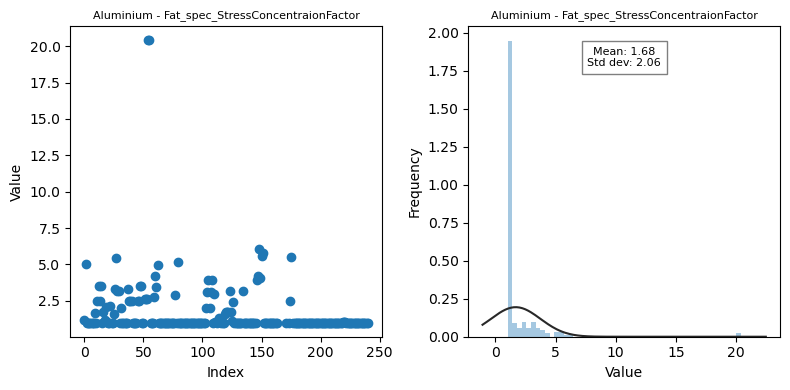

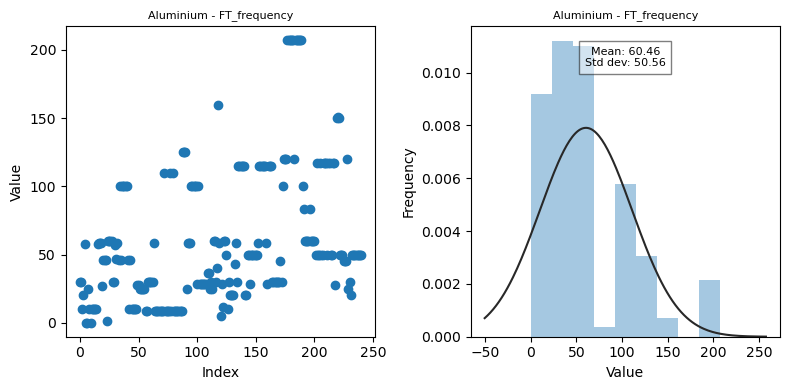

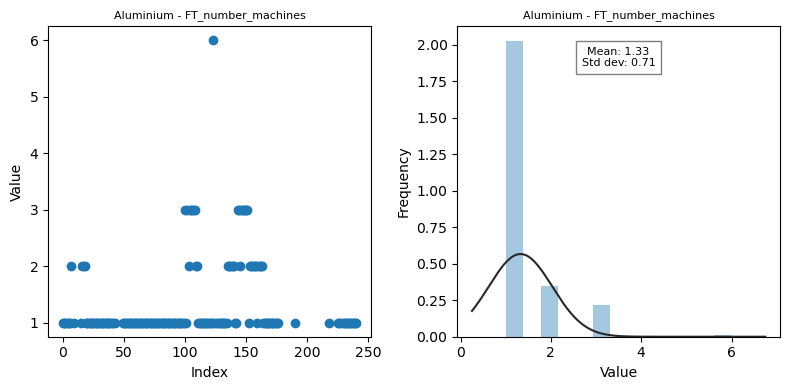

In [83]:
data = data_aluminium[num_col_aluminium]
scatter_gauss_plot(data,'Aluminium')

In [84]:
num_col_copper = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)', 'Material_size_width(mm)','Cu', 'Fe', 'Pb','HT_Geometry_diameter', 'HT_Geometry_thickness','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_Geometry_Thickness(mm)', 'TT_Geometry_Width(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_Geo_Thickness(mm)', 'Fat_spec_Geo_Tested Width(mm)', 'Fat_spec_StressConcentraionFactor','FT_frequency', 'FT_number_machines']

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_25864\1848931710.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], fit=norm, kde=False)


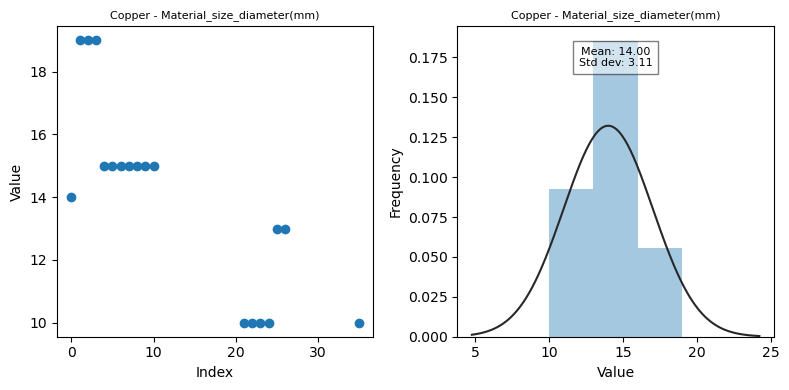

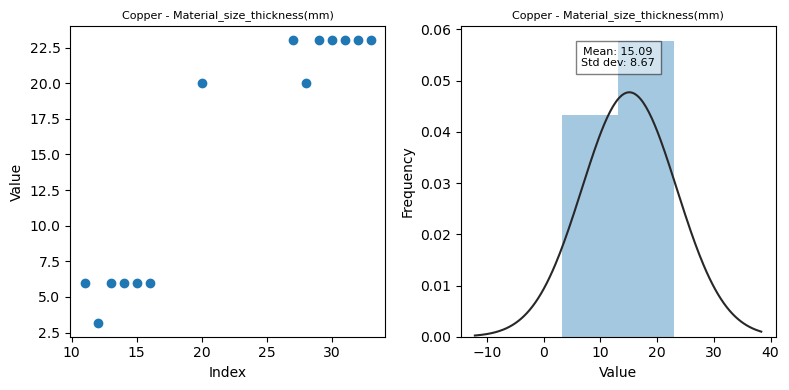

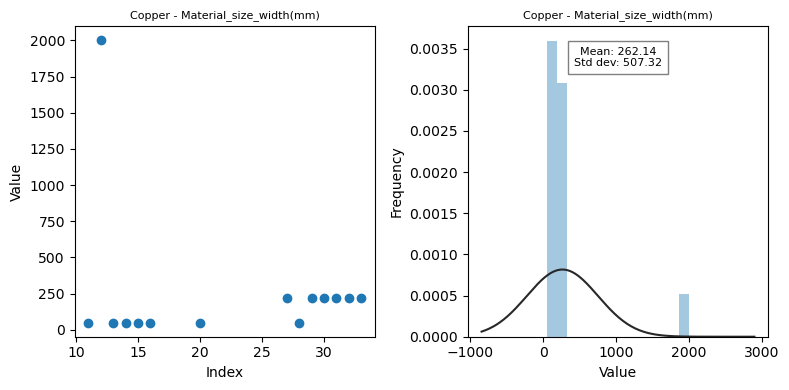

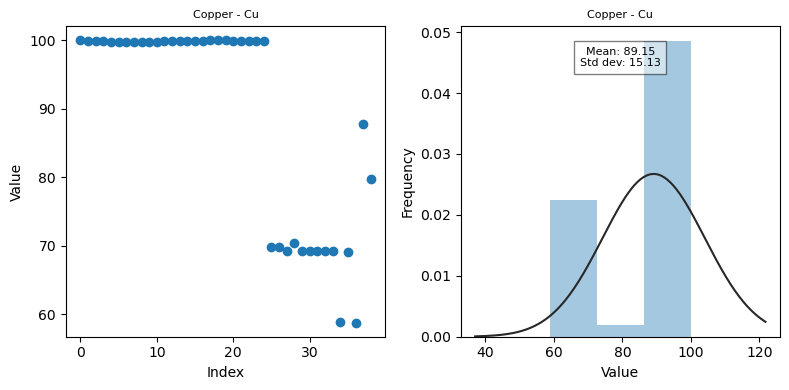

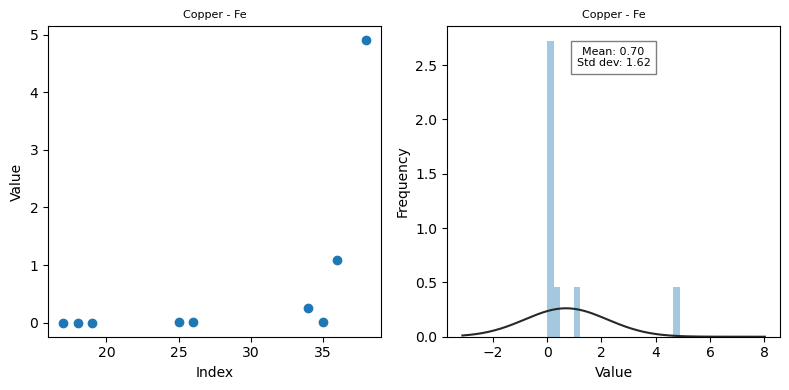

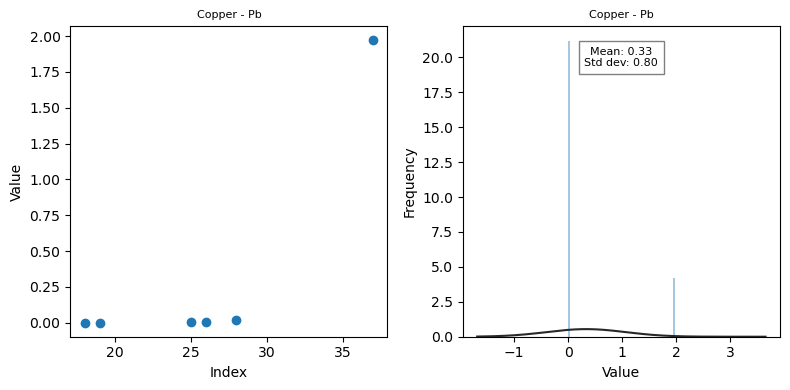

LinAlgError: Singular matrix. Skipping the distribution plot for Copper - HT_Geometry_diameter.


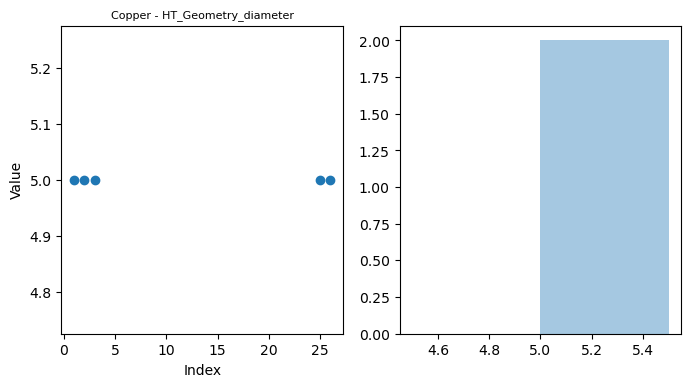

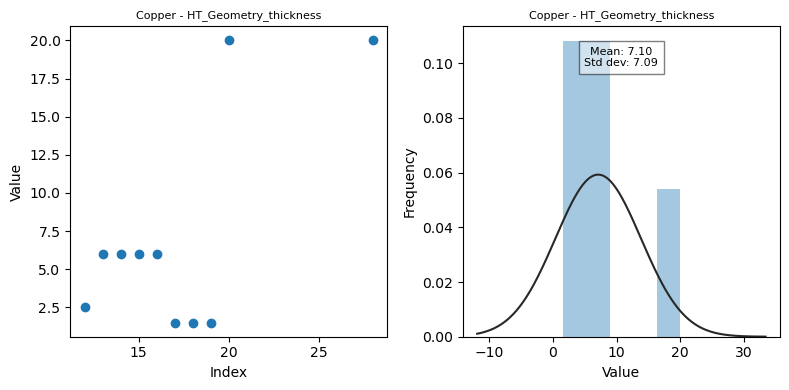

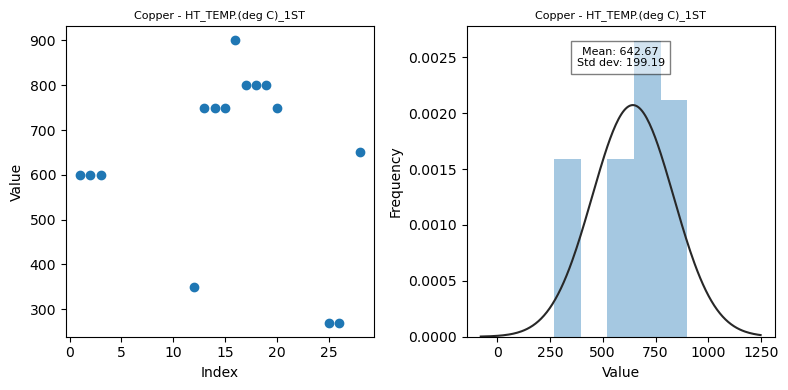

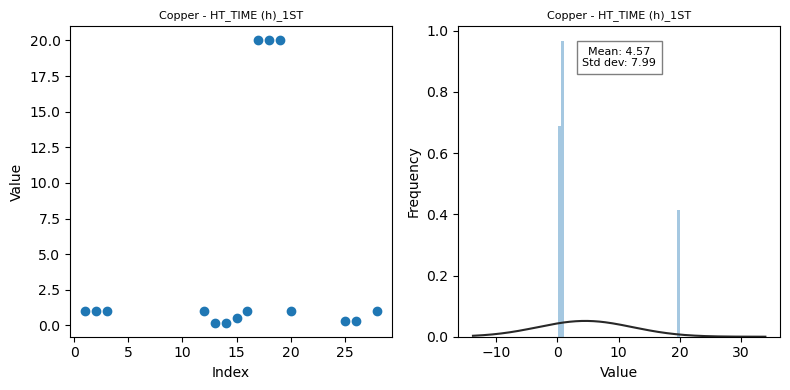

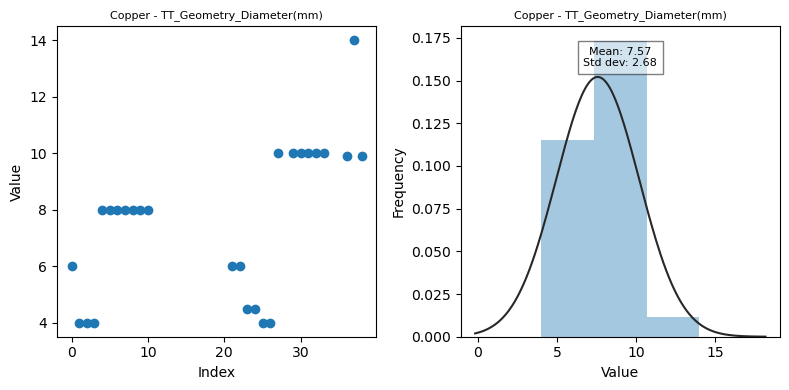

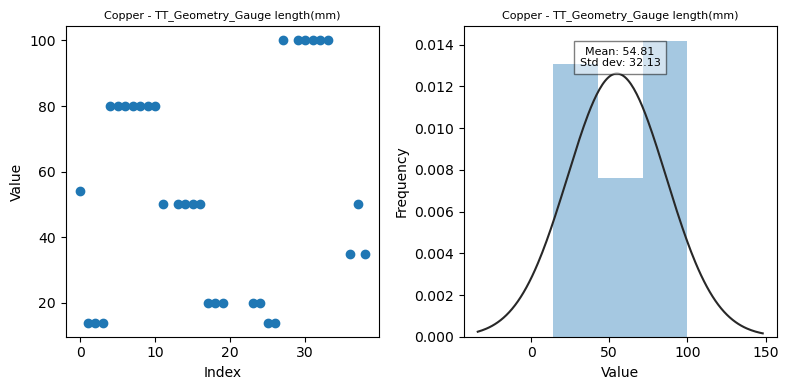

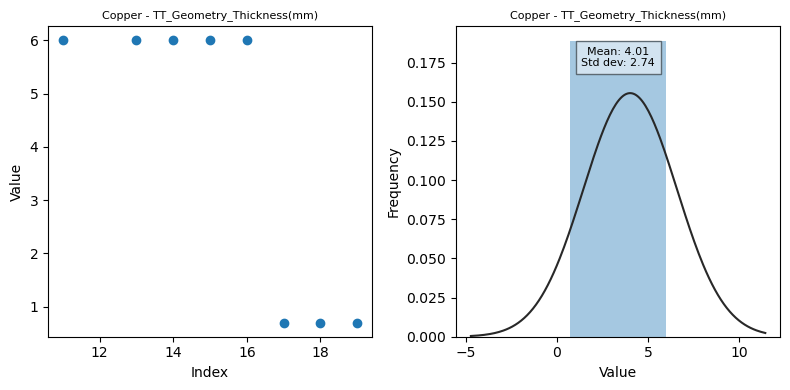

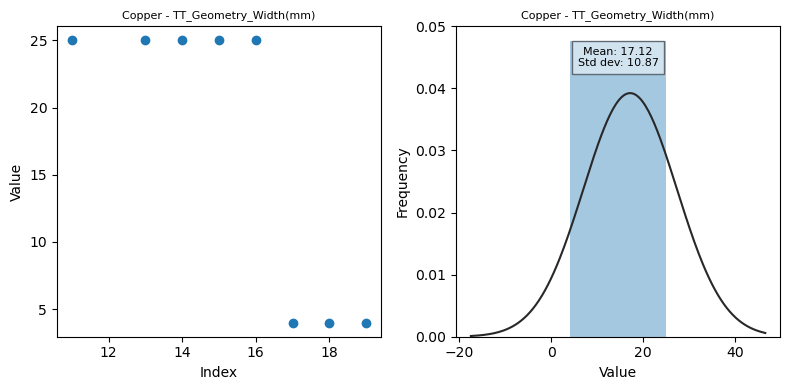

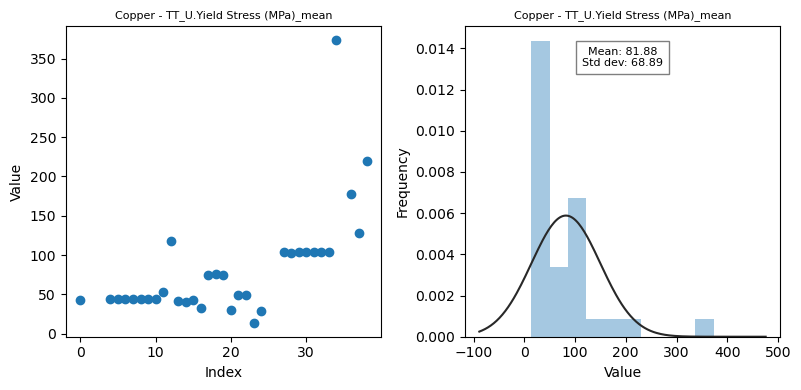

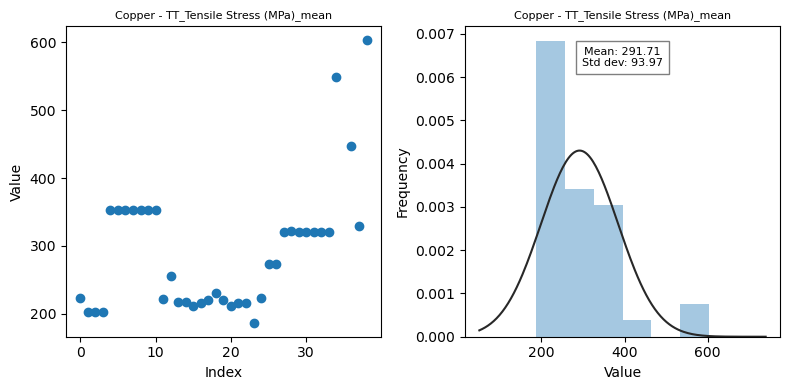

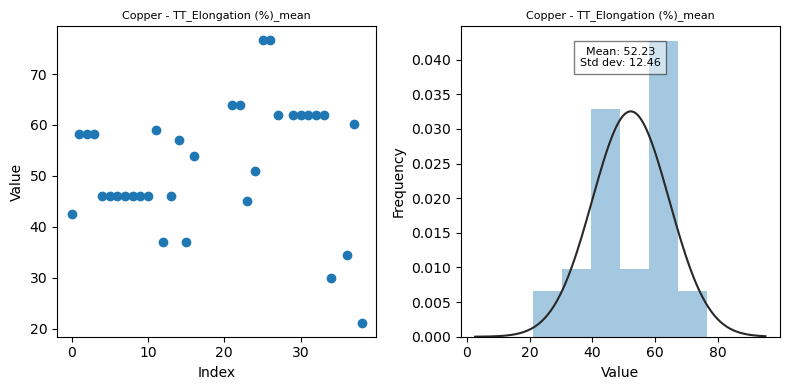

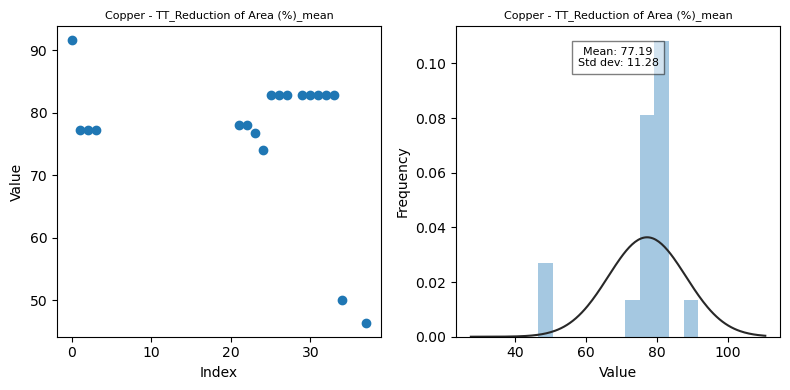

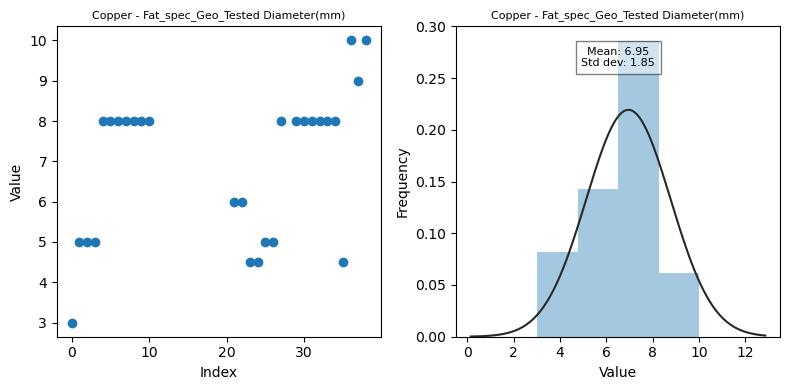

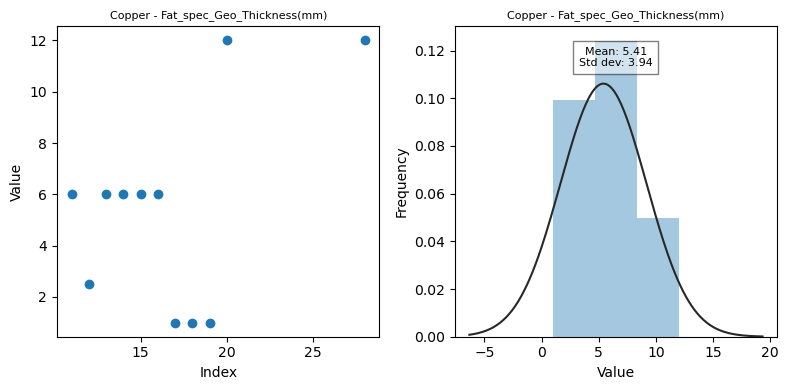

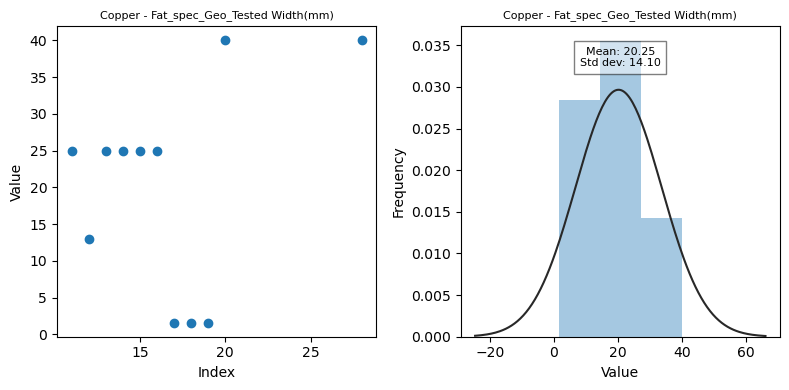

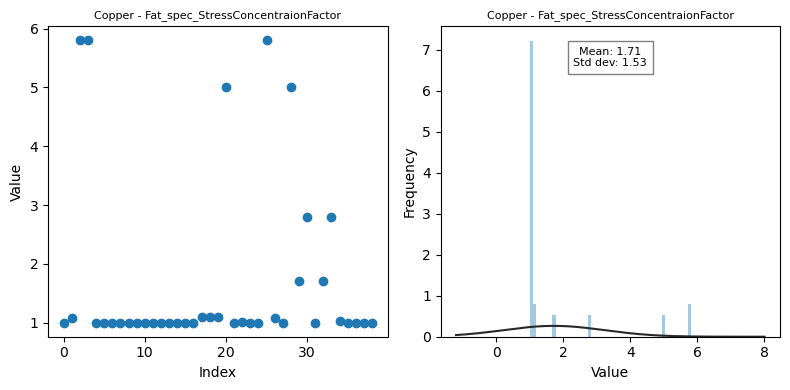

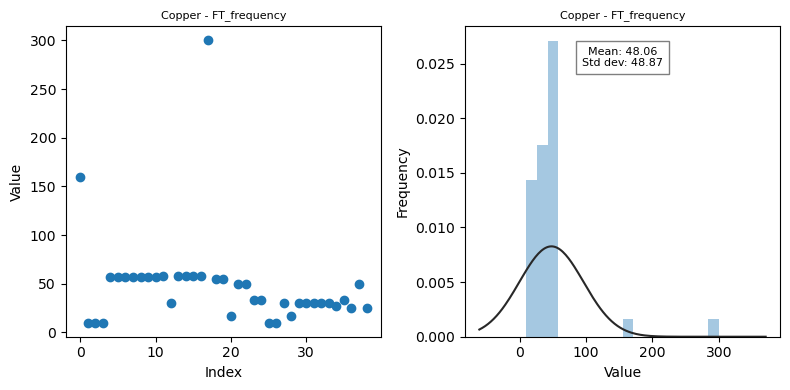

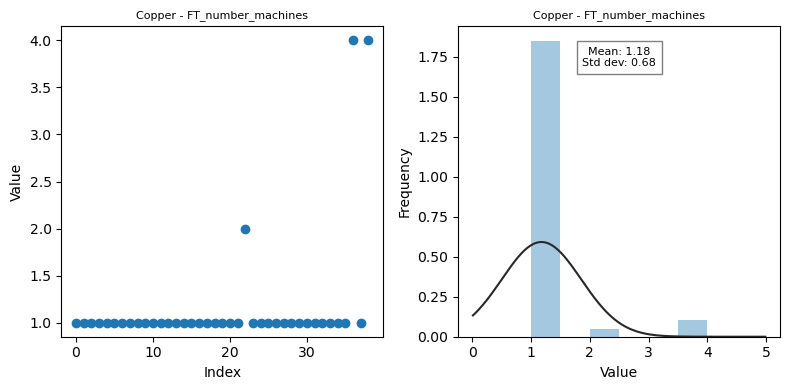

In [85]:
data = data_copper[num_col_copper]
scatter_gauss_plot(data,'Copper')

In [97]:
num_col_titanium = ['Material_size_diameter(mm)', 'Material_size_thickness(mm)','Ti','Al','Fe','V','C','N','O','HT_Geometry_diameter','HT_TEMP.(deg C)_1ST', 'HT_TIME (h)_1ST', 'TT_Geometry_Diameter(mm)', 'TT_Geometry_Gauge length(mm)','TT_U.Yield Stress (MPa)_mean', 'TT_Tensile Stress (MPa)_mean', 'TT_Elongation (%)_mean', 'TT_Reduction of Area (%)_mean','Fat_spec_Geo_Tested Diameter(mm)', 'Fat_spec_StressConcentraionFactor','FT_frequency', 'FT_number_machines']

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_25864\1848931710.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], fit=norm, kde=False)


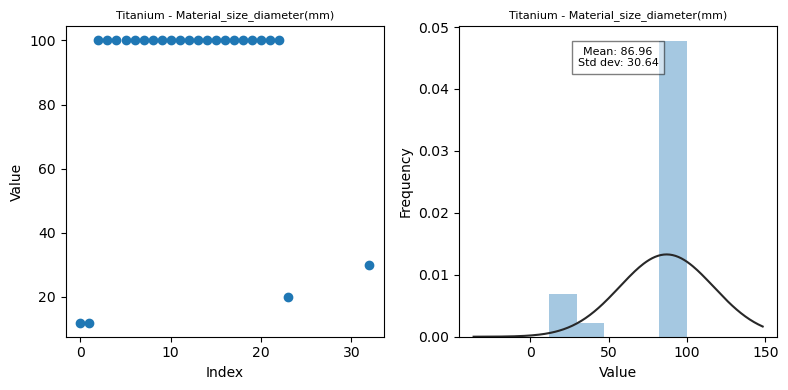

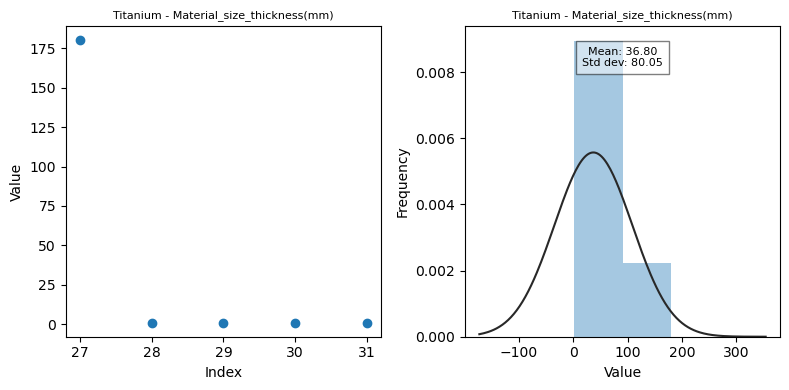

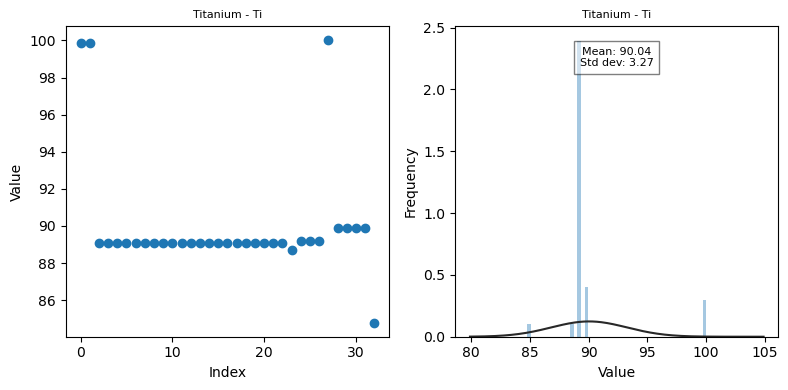

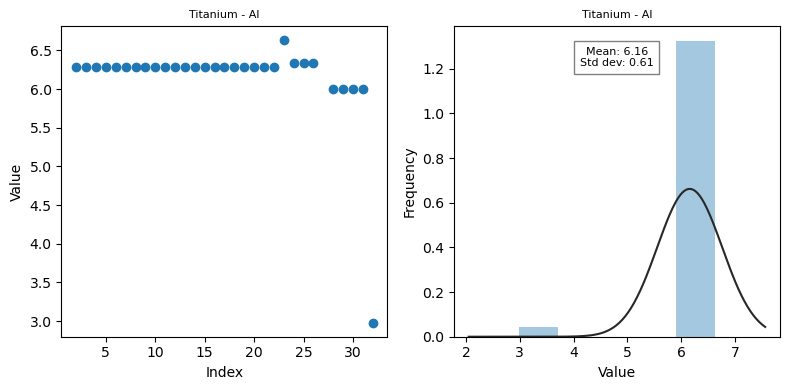

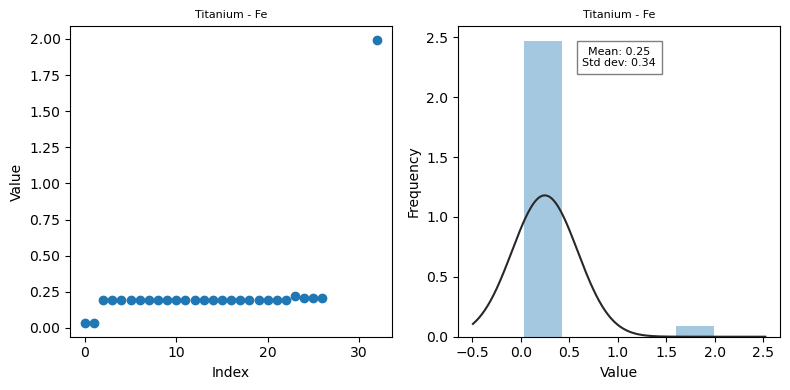

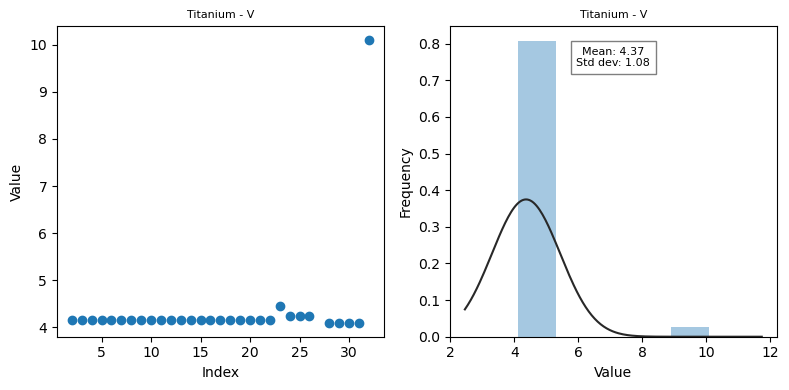

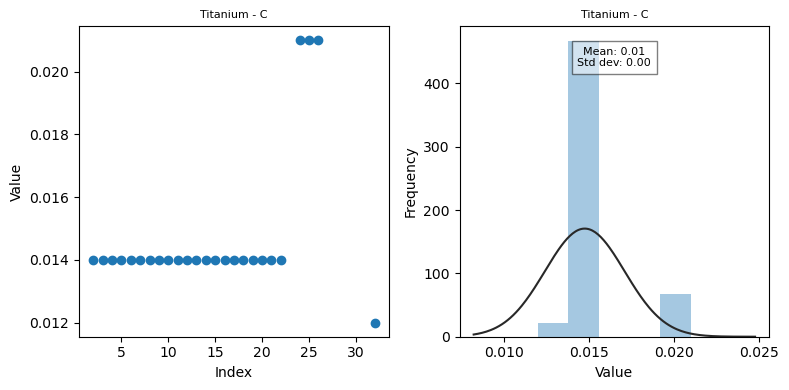

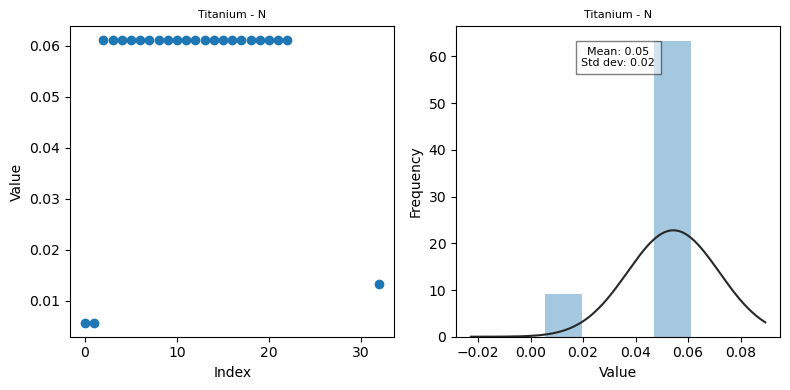

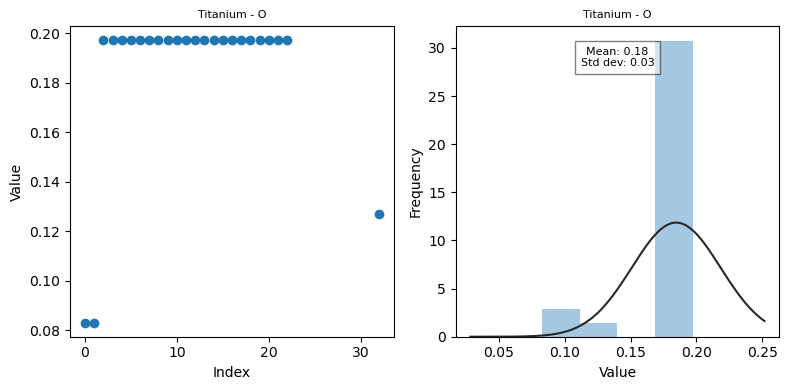

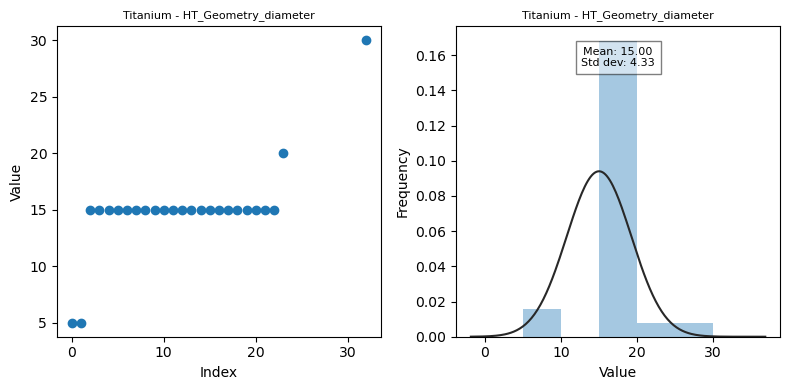

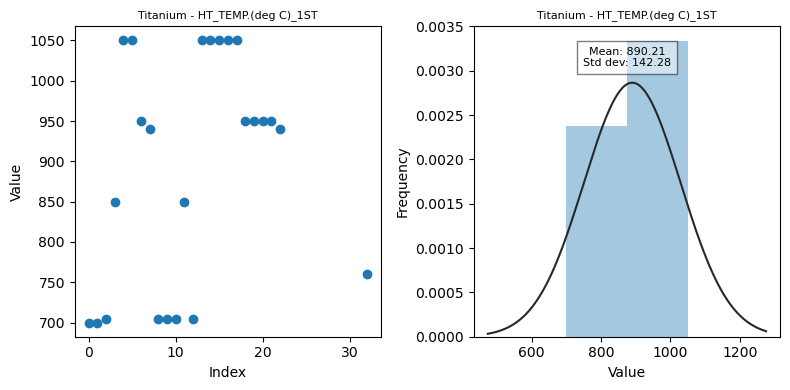

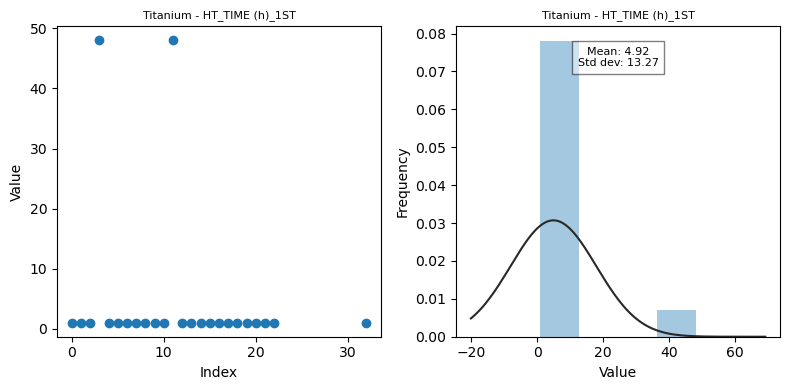

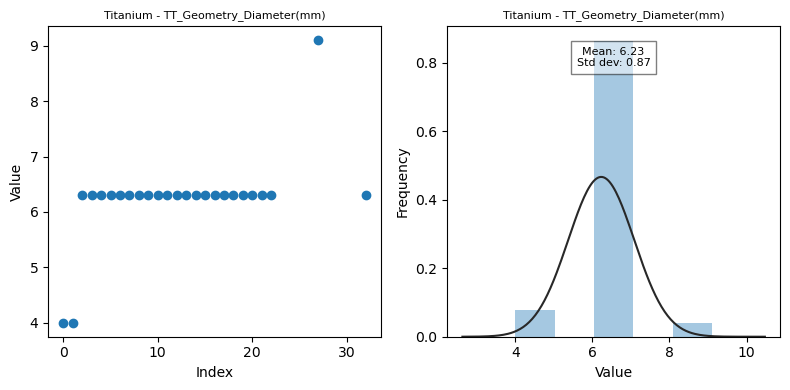

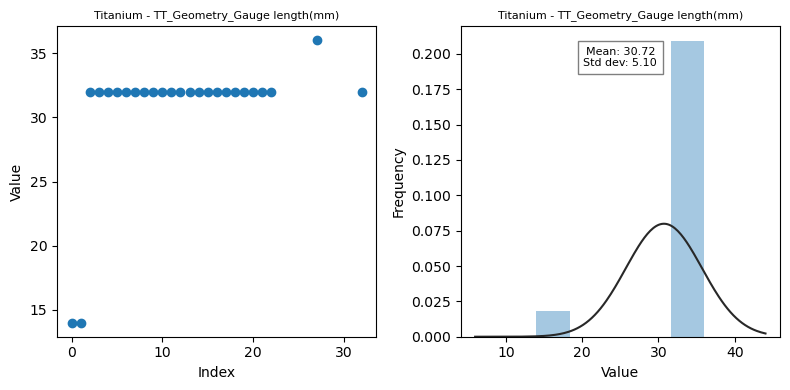

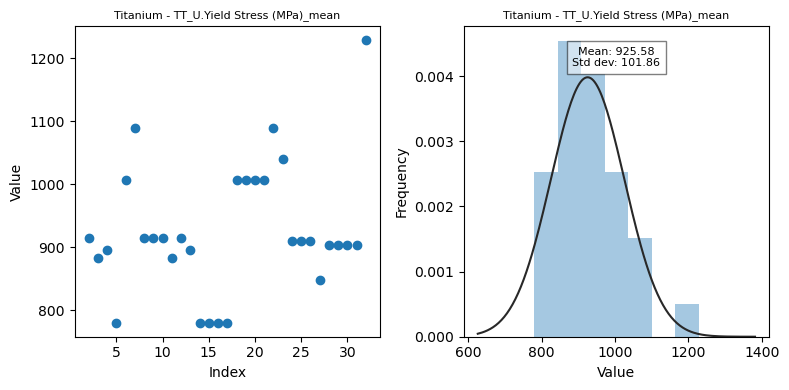

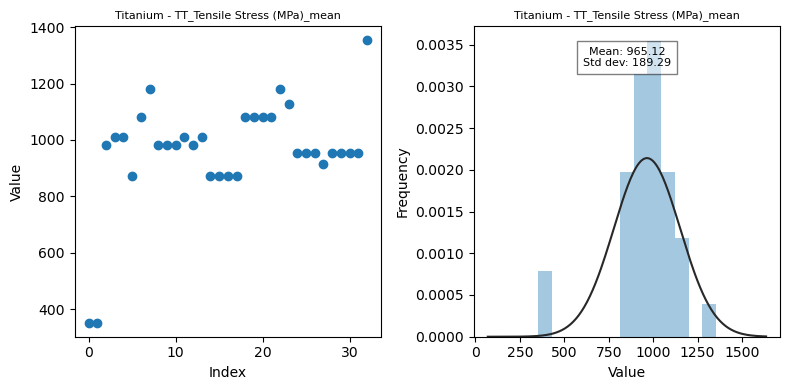

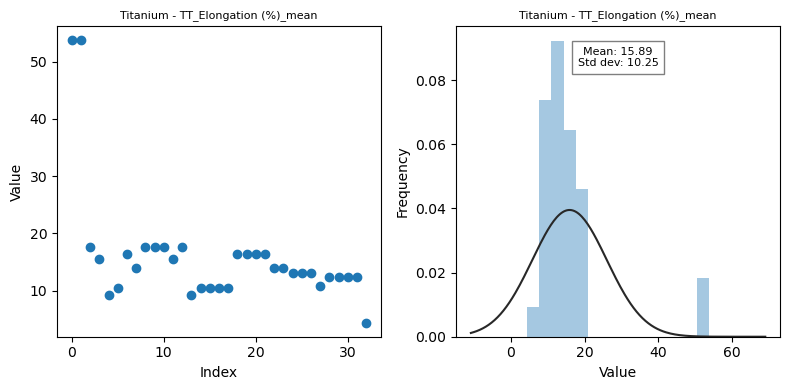

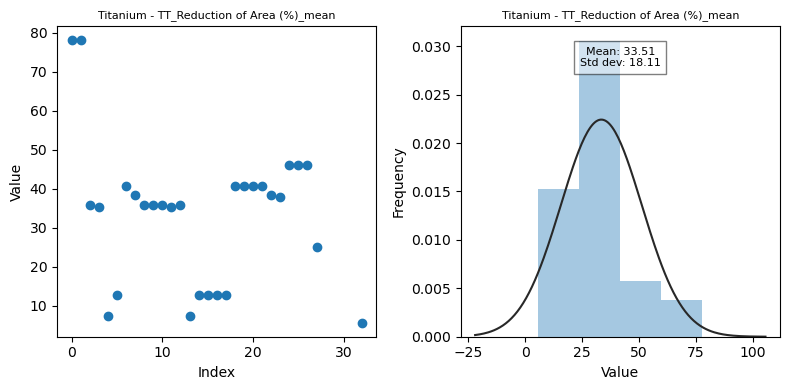

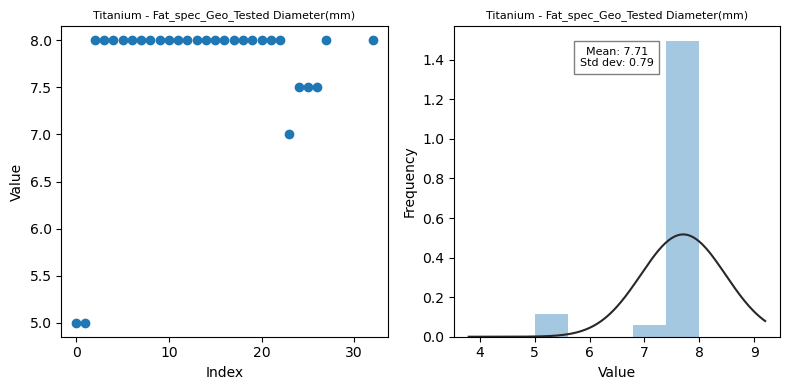

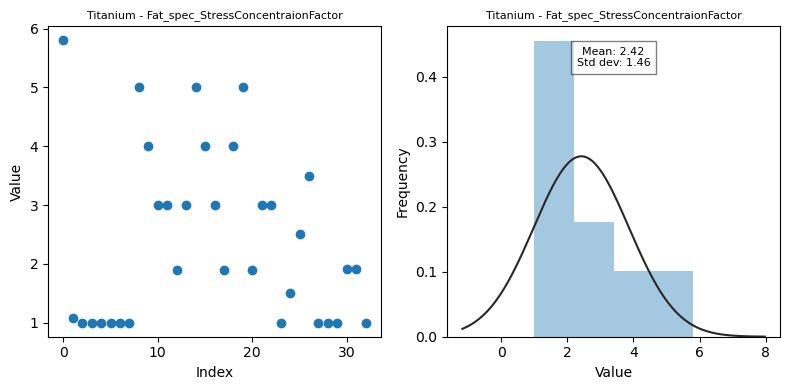

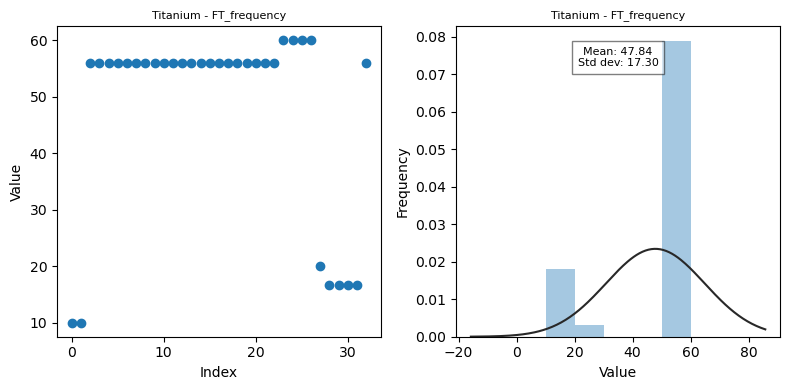

LinAlgError: Singular matrix. Skipping the distribution plot for Titanium - FT_number_machines.


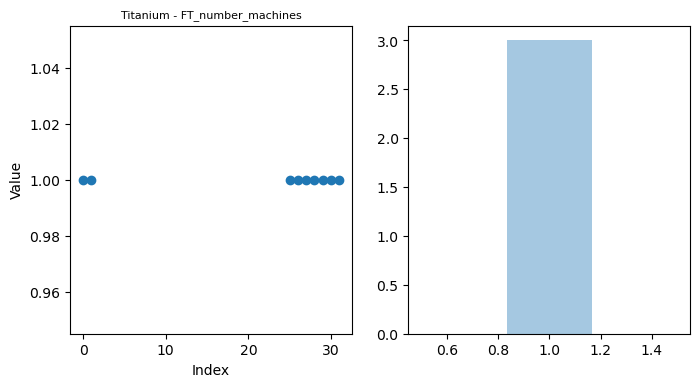

In [98]:
data = data_titanium[num_col_titanium]
scatter_gauss_plot(data,'Titanium')

Outliers plotting with Boxplot

In [ ]:
# Box plots for each column
for col in data_steel[num_col_ferrous].columns:
 plt.figure(figsize=(4,4))  # Create a new figure
 data_steel[col].plot(kind='box')
 plt.title(f'Steel - Box plot for {col}', fontsize=8)  
 plt.show()  # Display the plot

In [276]:
# Count the number of outliers
outliers = {}
total_length = len(data_steel[num_col_ferrous])
for col in data_steel[num_col_ferrous].columns:
 q1 = data_steel[col].quantile(0.25)
 q3 = data_steel[col].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outliers[col] = (data_steel[(data_steel[col] < lower_bound) | (data_steel[col] > upper_bound)][col].count() / total_length) * 100

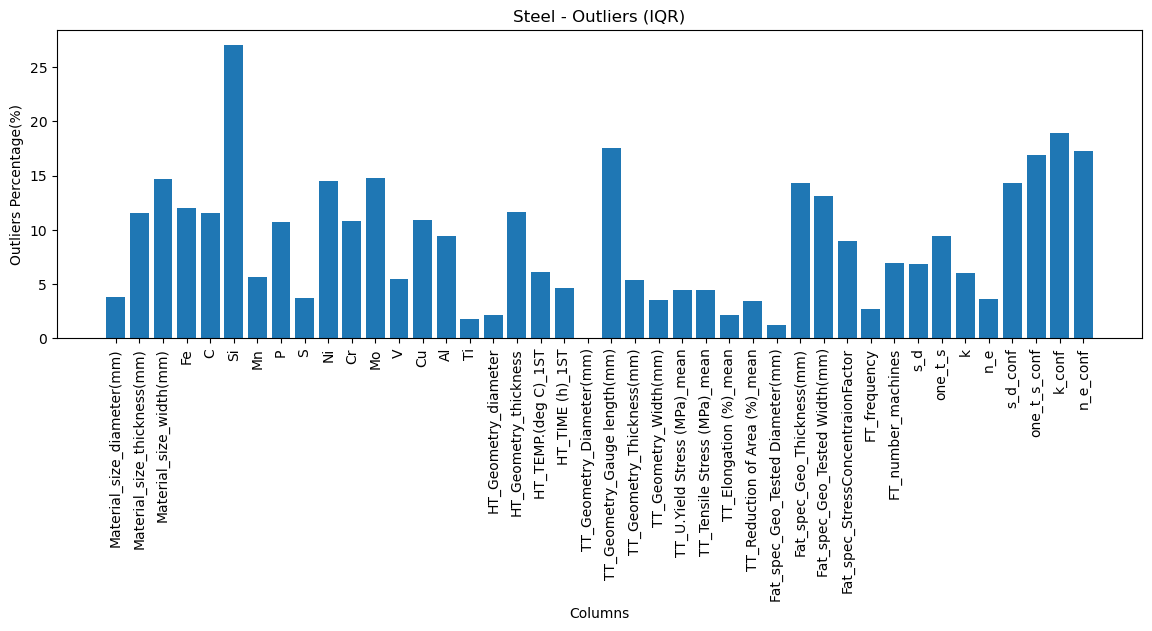

In [277]:
# Plot the count of outliers in a bar chart
plt.figure(figsize=(14, 4))
plt.bar(outliers.keys(), outliers.values())
plt.title('Steel - Outliers (IQR)')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Outliers Percentage(%)')
plt.show()

In [ ]:
for col in data_aluminium[num_col_nonferrous].columns:
 plt.figure(figsize=(4,4))  # Create a new figure
 data_aluminium[col].plot(kind='box')
 plt.title(f'Aluminium - Box plot for {col}', fontsize=8)  
 plt.show()  # Display the plot

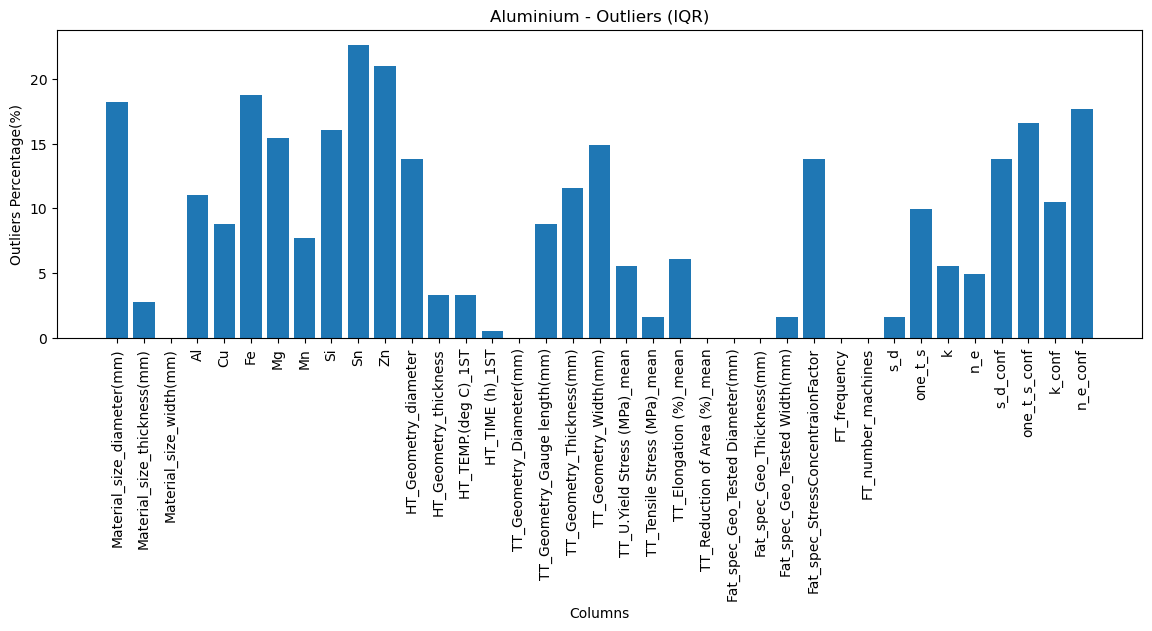

In [278]:
outliers = {}
total_length = len(data_aluminium[num_col_nonferrous])
for col in data_aluminium[num_col_nonferrous].columns:
 q1 = data_aluminium[col].quantile(0.25)
 q3 = data_aluminium[col].quantile(0.75)
 iqr = q3 - q1
 lower_bound = q1 - 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 outliers[col] = (data_aluminium[(data_aluminium[col] < lower_bound) | (data_aluminium[col] > upper_bound)][col].count() / total_length) * 100

plt.figure(figsize=(14, 4))
plt.bar(outliers.keys(), outliers.values())
plt.title('Aluminium - Outliers (IQR)')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Outliers Percentage(%)')
plt.show()

Outlier detection with Z-score

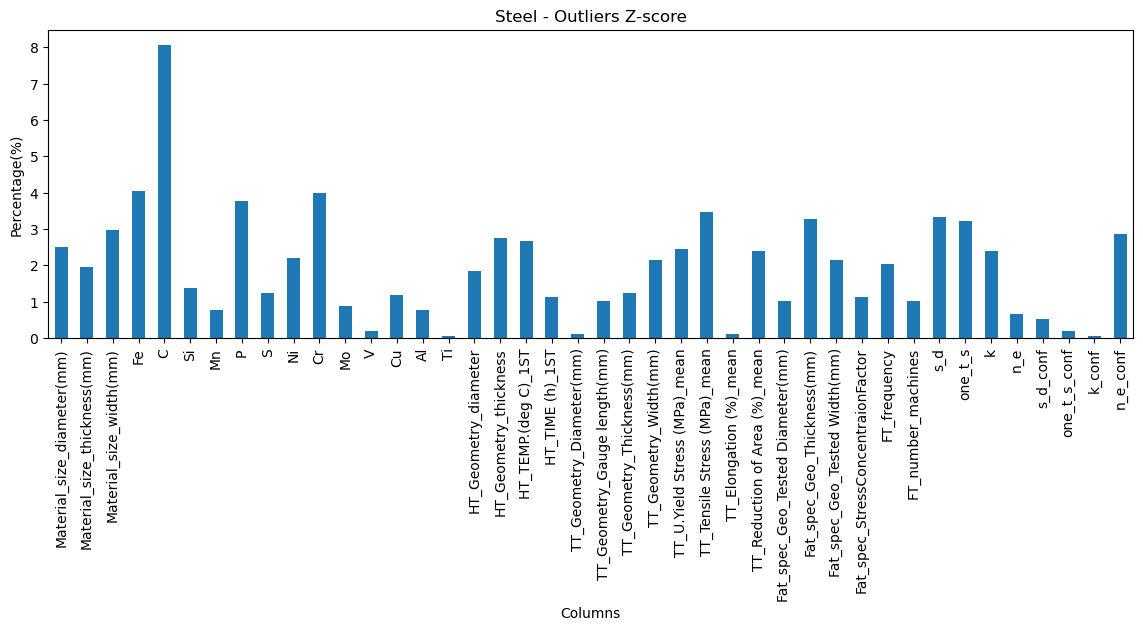

In [279]:
# Function to calculate number of outliers using Z score
def count_outliers(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    return (z_scores >2.5).sum()



outliers_count = data_steel[num_col_ferrous].apply(count_outliers)
total_rows = len(data_steel)
outliers_percentage = (outliers_count / total_rows) *100  # Plot the percentage of outliers in each column

plt.figure(figsize=(14,4))
outliers_percentage.plot(kind='bar')
plt.title('Steel - Outliers Z-score')
plt.xlabel('Columns')
plt.ylabel('Percentage(%)')
plt.show()

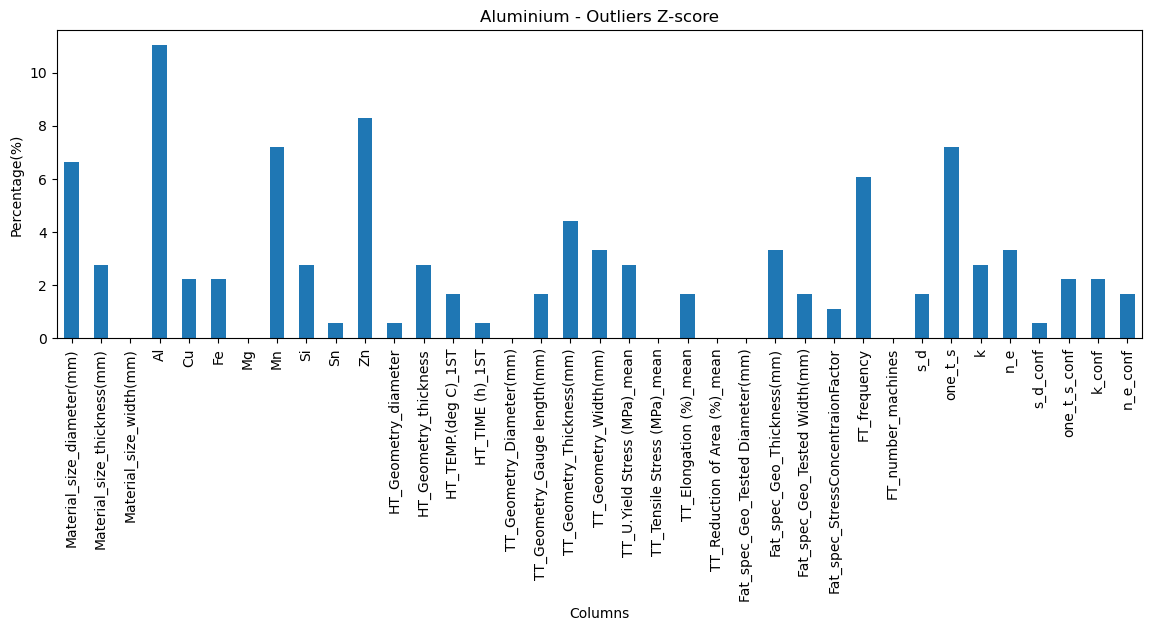

In [280]:
outliers_count = data_aluminium[num_col_nonferrous].apply(count_outliers)
total_rows = len(data_aluminium)
outliers_percentage = (outliers_count / total_rows) *100  # Plot the percentage of outliers in each column

plt.figure(figsize=(14,4))
outliers_percentage.plot(kind='bar')
plt.title('Aluminium - Outliers Z-score')
plt.xlabel('Columns')
plt.ylabel('Percentage(%)')
plt.show()

In [43]:
def pairplot(df1, df2,  columns_pairplots):

    # Add a label column to each DataFrame
    df1['Dataset'] = 'JSMS'
    df2['Dataset'] = 'DaBef'
    #df3['Dataset'] = 'NIMS + RB'
    df1 = df1.rename(columns={'Rm':'$R_m$', 'Kt':'$K_t$', 's_d':'$S_d$'})
    df2 = df2.rename(columns={'Rm':'$R_m$', 'Kt':'$K_t$', 's_d':'$S_d$'})
    #df3 = df3.rename(columns={'Rm':'$R_m$', 'Kt':'$K_t$', 's_d':'$S_d$'})

    # Concatenate the DataFrames
    df_combined = pd.concat([df1, df2], ignore_index=True)
    # Set the style
    sns.set_theme(style="white")
    for name, col in columns_pairplots.items():
        plot_para = {
                    'axes.titlesize': 26,       # Title font size
                    'axes.labelsize': 26,       # Axis label font size
                    'xtick.labelsize': 26,       # X-axis tick label font size
                    'ytick.labelsize': 26,       # Y-axis tick label font size
                    'legend.fontsize': 20,       # Legend font size
                    #'font.size': 20             # General font size
                }
        plt.rcParams.update(plot_para)
        
        sns.pairplot(df_combined, vars=col, hue='Dataset')
        plt.show()

def filter_col(df, columns_filter):
    for col, strings in columns_filter.items():
            indices_list = []
            for i in range(len(df)):
                if df[col][i] not in strings:
                    indices_list.append(i)
            df = df.drop(indices_list).reset_index(drop = True)
    return df

In [34]:
columns_pairplots =  {'Mechanical properties' : ['$R_m$', '$K_t$', '$S_d$']}

In [37]:
data_jsms = pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\All Data\JSMS Data Steel.xlsx")
data_steel = pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\All Data\NIMS_RB_DaBef Data Steel.xlsx")

data_nims = data_steel[data_steel['Data'] != 'DaBef'].reset_index(drop=True)
data_dabef = data_steel[data_steel['Data'] == 'DaBef'].reset_index(drop=True)

columns = ['Re_U','Rm', 'A5', 'Kt', 'R_ratio', 'f_test', 'L_Type', 'Control', 'Stress_Type', 's_d']
data_jsms = data_jsms[columns]
data_nims = data_nims[columns]
data_dabef = data_dabef[columns]

data_jsms = data_jsms[data_jsms['s_d']!=0].reset_index(drop=True)
data_nims = data_nims[data_nims['s_d']!=0].reset_index(drop=True)
data_dabef = data_dabef[data_nims['s_d']!=0].reset_index(drop=True)

columns_filter = {'Stress_Type': ['CONSTANT STRESS RATIO'], 'Control':['load', 'Force', 'Stress'], 'L_Type':['Bending','Torsion','Tension-compression']}

data_jsms = filter_col(data_jsms, columns_filter)
data_nims = filter_col(data_nims, columns_filter)
data_dabef = filter_col(data_dabef, columns_filter)

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_13068\4277533356.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_dabef = data_dabef[data_nims['s_d']!=0].reset_index(drop=True)


In [51]:
data_jsms_alu = pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\All Data\JSMS Data Aluminium.xlsx")
data_dabef_alu = pd.read_excel(r"C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\01_Data\All Data\DaBef Data Aluminium.xlsx")

columns = ['Re_U','Rm', 'A5', 'Kt', 'R_ratio', 'f_test', 'L_Type', 'Control', 'Stress_Type', 's_d']
data_jsms_alu = data_jsms_alu[columns]
data_dabef_alu = data_dabef_alu[columns]

data_jsms_alu = data_jsms_alu[data_jsms_alu['s_d']!=0].reset_index(drop=True)
data_dabef_alu = data_dabef_alu[data_dabef_alu['s_d']!=0].reset_index(drop=True)

data_jsms_alu = data_jsms_alu[data_jsms_alu['s_d']<200].reset_index(drop=True)
data_dabef_alu = data_dabef_alu[data_dabef_alu['s_d']<200].reset_index(drop=True)

columns_filter = {'Stress_Type': ['CONSTANT STRESS RATIO'], 'Control':['load', 'Force', 'Stress']}

data_jsms_alu = filter_col(data_jsms_alu, columns_filter)
data_dabef_alu = filter_col(data_dabef_alu, columns_filter)


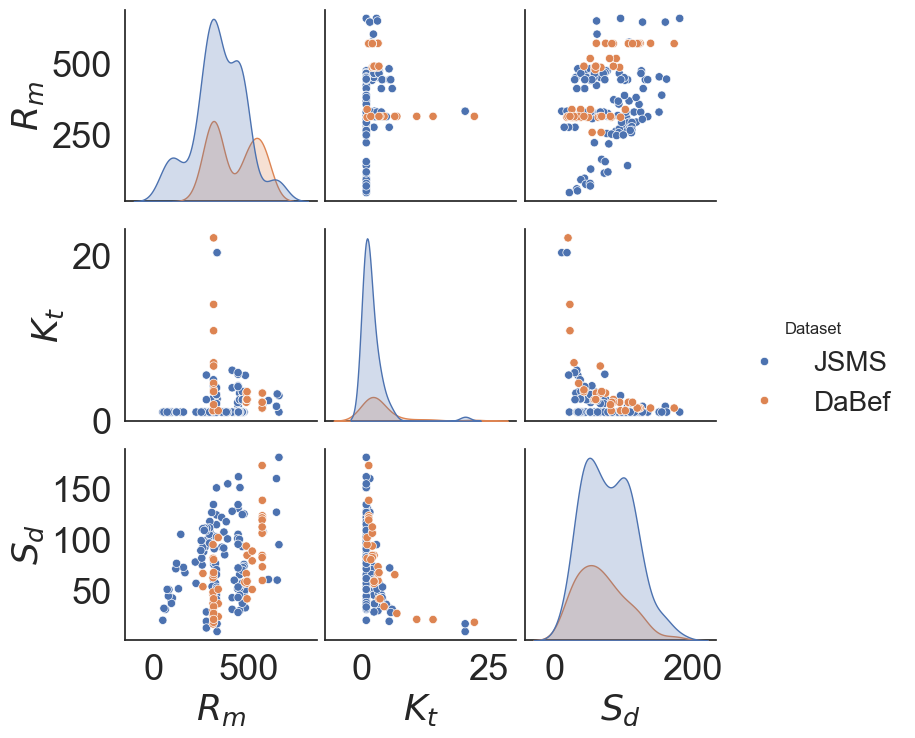

In [45]:
pairplot(data_jsms_alu, data_dabef_alu, columns_pairplots)

In [76]:
seed =       [8,     11,    15,    21,    23,    57,    31,    36,    44,    51,    29,    41,    43,    65,    72]
rf_mae =     [14.69, 13.3,  11.66, 15.26, 17.54, 14.36, 12.53, 13.16, 11.09, 10.73, 10.86, 18.52, 16.52, 15.47, 9.1]
rf_r2score = [0.81,  0.78,  0.75,  0.78,  0.68,  0.65,  0.68,  0.82,  0.75,  0.82,  0.8,   0.72,  0.71,  0.76,  0.84]
nn_mae =     [18.41, 18.14, 9.66,  15.25, 12.05, 13.02, 10.01, 9.62,  11.29, 8.94,  7.97,  13.47, 14.96, 17.65, 7.06]
nn_r2score = [0.65,  0.68,  0.88,  0.79,  0.86,  0.72,  0.8,   0.92,  0.770, 0.87,  0.91,  0.84,  0.76,  0.78,  0.93]

allfold_rf_mae =     [14.52, 13.69, 13.67, 12.81, 13.95, 13.24, 13.39, 14.61, 13.6, 12.74, 13.08, 14.14, 13.59, 13.38, 13.29]
allfold_rf_r2score = [0.71, 0.75, 0.75, 0.78, 0.73, 0.77, 0.76, 0.73, 0.76, 0.78, 0.77, 0.74, 0.76, 0.76, 0.76]
allfold_nn_mae =     [12.16, 13.82, 12.46, 13.38, 13.04, 12.57, 13.49, 12.64, 11.78, 12.4, 12.13, 13.47, 11.78, 12.52, 11.51]
allfold_nn_r2score = [0.78, 0.77, 0.8, 0.73, 0.74, 0.75, 0.72, 0.74, 0.8, 0.81, 0.83, 0.77, 0.8, 0.8, 0.77]

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plot_two_normal_distributions(data1, data2):
    # Set the style
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 8))
    plot_para = {
                    'axes.titlesize': 26,       # Title font size
                    'axes.labelsize': 26,       # Axis label font size
                    'xtick.labelsize': 26,       # X-axis tick label font size
                    'ytick.labelsize': 26,       # Y-axis tick label font size
                    'legend.fontsize': 20,       # Legend font size
                    'font.size': 20             # General font size
                }
    plt.rcParams.update(plot_para)

    # Calculate mean and std for both datasets
    mean1, std1 = np.mean(data1), np.std(data1)
    mean2, std2 = np.mean(data2), np.std(data2)

    sns.kdeplot(x=data1, label=f'Random split (Mean: {mean1:.2f}, Std: {std1:.2f})', fill=True, alpha=0.3)
    sns.kdeplot(x=data2, label=f'K-Fold testing (Mean: {mean2:.2f}, Std: {std2:.2f})', fill=True, alpha=0.3)

    # Labels and title
    plt.xlabel('MAE: $S_d$ (Mpa)')
    plt.ylabel('Density')
    #plt.title()
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1.15), fontsize='small')
    plt.grid(True)
    plt.show()

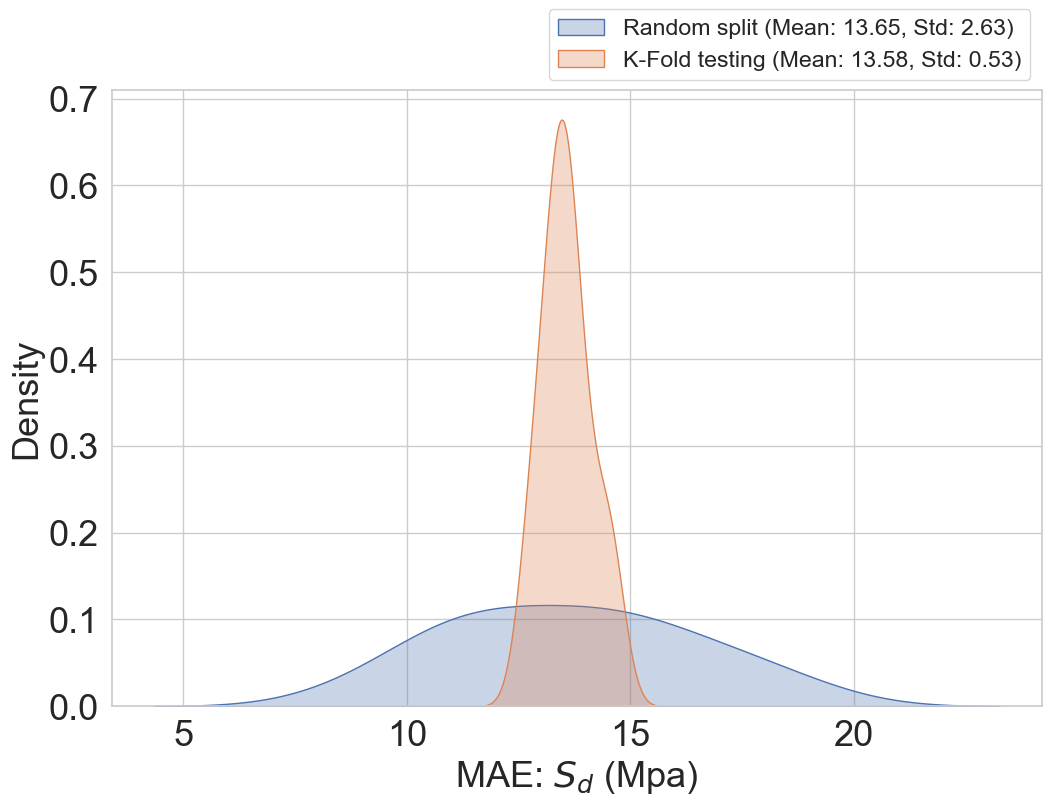

In [78]:

plot_two_normal_distributions(rf_mae, allfold_rf_mae)

C:\Users\ngc2kor\AppData\Local\Temp\ipykernel_13068\3580640963.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


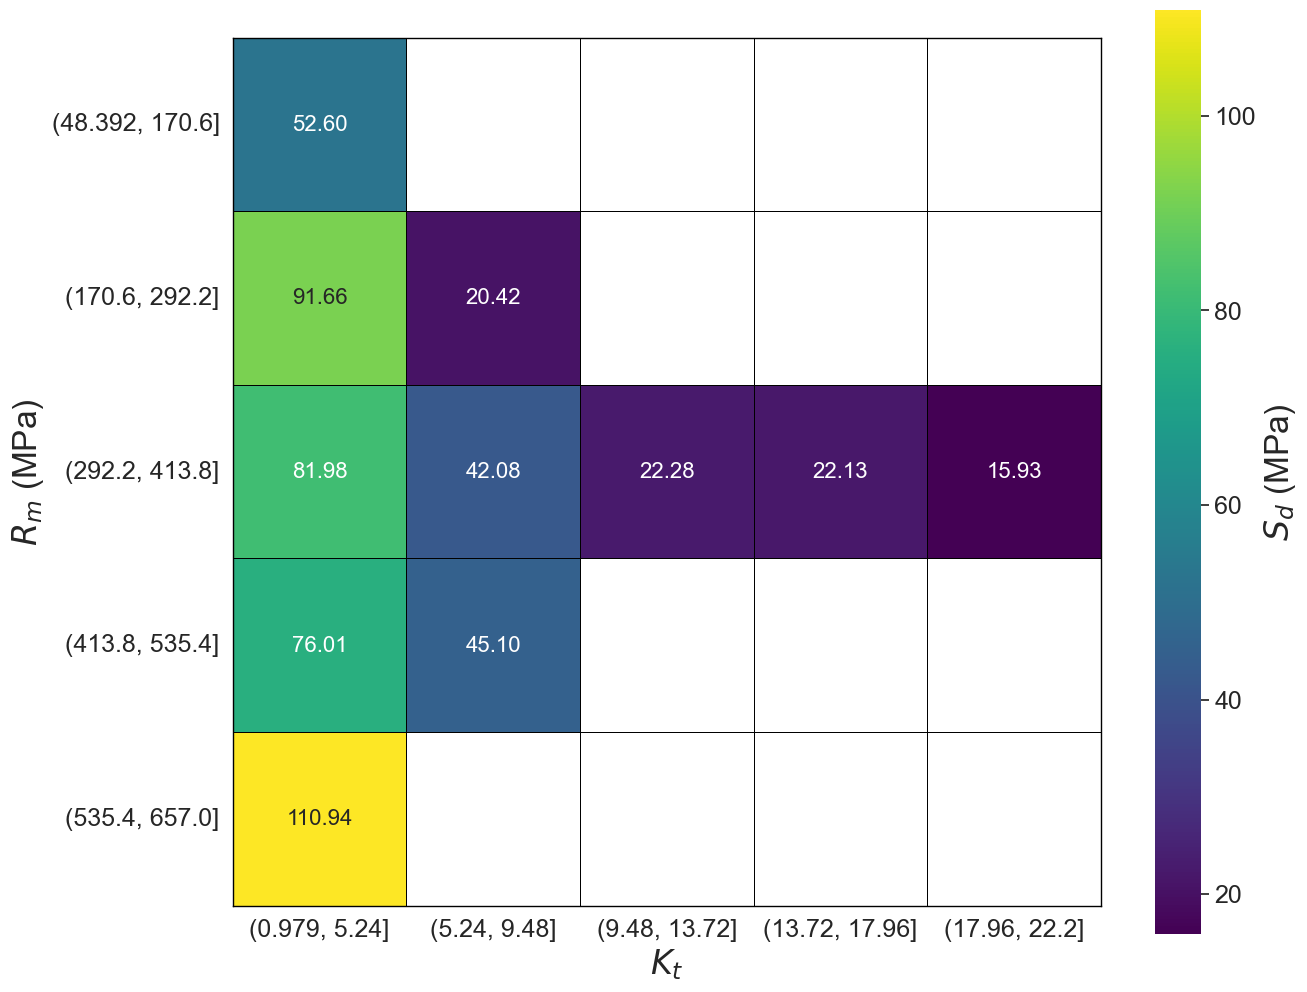

In [61]:
df = pd.concat((data_jsms_alu, data_dabef_alu), axis=0, ignore_index=True)

# Bin the features into fewer intervals (e.g., 10 bins) and get bin edges
feature1_bins = pd.cut(df['Rm'], bins=5, retbins=True)
feature2_bins = pd.cut(df['Kt'], bins=5, retbins=True)

# Assign binned labels to features
df['Feature1_binned'] = feature1_bins[0]
df['Feature2_binned'] = feature2_bins[0]

# Get bin edges for labeling
feature1_labels = [f"{int(left)}-{int(right)}" for left, right in zip(feature1_bins[1][:-1], feature1_bins[1][1:])]
feature2_labels = [f"{int(left)}-{int(right)}" for left, right in zip(feature2_bins[1][:-1], feature2_bins[1][1:])]

# Pivot table to aggregate target values (e.g., mean target value for binned feature combinations)
heatmap_data = df.pivot_table(
    index='Feature1_binned', 
    columns='Feature2_binned', 
    values='s_d', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(14, 12))
plt.rcParams.update({
                        'axes.titlesize': 24,
                        'axes.labelsize': 24,
                        'xtick.labelsize': 18,
                        'ytick.labelsize': 18,
                        'legend.fontsize': 24,
                        'font.size': 16
                })
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="viridis", 
    fmt=".2f", 
    cbar=True, 
    square=True, 
    linewidths=0.5, 
    linecolor='black'
)


# Add black border around the heatmap
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

cbar = ax.collections[0].colorbar
cbar.set_label('$S_d$ (MPa)')

# Titles and labels
#plt.title("Heatmap with Real Bin Ranges on Axes")
plt.xlabel("$K_t$")
plt.ylabel("$R_m$ (MPa)")
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

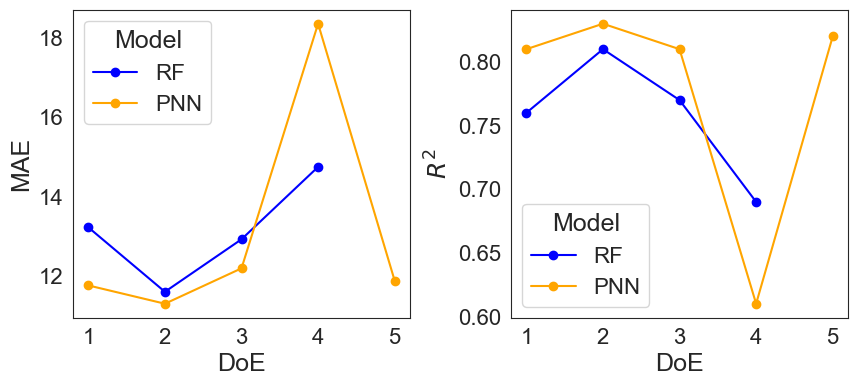

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(doe_rf, mae_rf, r2_rf, doe_nn, mae_nn, r2_nn):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Unique DOE values from both lists for correct x-ticks
    unique_doe = sorted(set(doe_rf + doe_nn))

    # Plot MAE
    axes[0].plot(doe_rf, mae_rf, 'o-', label="RF", color="blue")
    axes[0].plot(doe_nn, mae_nn, 'o-', label="PNN", color="orange")
    axes[0].set_xlabel("DoE", fontsize=18)
    axes[0].set_ylabel("MAE", fontsize=18)
    axes[0].set_xticks(unique_doe)
    axes[0].tick_params(axis='both', labelsize=16)
    axes[0].legend(title="Model", fontsize=16, title_fontsize=18)

    # Plot R^2 Score
    axes[1].plot(doe_rf, r2_rf, 'o-', label="RF", color="blue")
    axes[1].plot(doe_nn, r2_nn, 'o-', label="PNN", color="orange")
    axes[1].set_xlabel("DoE", fontsize=18)
    axes[1].set_ylabel(r"$R^2$", fontsize=18)
    axes[1].set_xticks(unique_doe)
    axes[1].tick_params(axis='both', labelsize=16)
    axes[1].legend(title="Model", fontsize=16, title_fontsize=18)
    plt.subplots_adjust(wspace=0.3)
    #plt.tight_layout()
    plt.show()

# Example data
doe_rf = [1, 2, 3, 4]
mae_rf = [13.22, 11.6, 12.92, 14.74]
r2_rf = [0.76, 0.81, 0.77, 0.69]

doe_nn = [1, 2, 3, 4, 5]
mae_nn = [11.76, 11.3, 12.19, 18.34, 11.88]
r2_nn = [0.81, 0.83, 0.81, 0.61, 0.82]

plot_metrics(doe_rf, mae_rf,r2_rf, doe_nn, mae_nn, r2_nn)
